<a href="https://colab.research.google.com/github/Dark1zin/Previsoes-Walmart/blob/main/Previs%C3%B5es_de_vendas_do_walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*1- Importando das Principais Bibliotecas.*




In [ ]:
# importando a biblioteca numpy para trabalhar com arrays e operações matemáticas de alta performance.
import numpy as np
# importando a biblioteca pandas para trabalhar com DataFrames.
import pandas as pd
from pandas.plotting import autocorrelation_plot as auto_corr
# Função do Pandas usada para visualizar a correlação entre os dados de uma série temporal em diferentes intervalos.

# *2- Bibliotecas de Visualização de dados.*

In [ ]:
# importando a Biblioteca matplotlib para criar gráficos personalizáveis.
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns #  Biblioteca para visualização de dados baseada no Matplotlib, mas com gráficos mais elegantes e fáceis de usar.

# *3- Bibliotecas de Manipulação de Datas.*

In [ ]:
# Importando a Biblioteca math para trabalhar matemática padrão do Python para operações como cálculos de raiz quadrada, logaritmos, ou arredondamentos.
import math
from datetime import datetime # Permite trabalhar com datas e horários, por exemplo, pegar a data atual ou converter strings em objetos de data.
from datetime import timedelta # Útil para realizar operações entre datas, como adicionar ou subtrair dias, horas, etc.

# *4- Outras Bibliotecas e Modelos Estatísticos.*

In [ ]:
import itertools # Ferramenta para manipulação de coleções iteráveis, como gerar combinações, permutações ou produtos cartesianos.
import statsmodels.api as sm # Biblioteca usada para criar modelos estatísticos e analisar os resultados.
import statsmodels.tsa.api as smt # Especializada em análise de séries temporais.
import statsmodels.formula.api as smf # Permite definir modelos estatísticos usando fórmulas semelhantes às da linguagem R.

# *5- Ferramentas de Machine Learning.*

In [ ]:
# scikit-learn: Biblioteca amplamente usada em Machine Learning.

from sklearn.model_selection import train_test_split  # train_test_split: Divide os dados em conjuntos de treinamento e teste.
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error # mean_squared_error, mean_absolute_error: Avaliam o erro de modelos de regressão.
from sklearn.metrics import accuracy_score, balanced_accuracy_score # accuracy_score, balanced_accuracy_score: Avaliam a performance de modelos de classificação.
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline # Pipeline: Facilita a criação de fluxos de trabalho completos, como pré-processamento e treino de modelos.
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor: Modelo baseado em árvores de decisão, usado para prever valores contínuos.
from sklearn import metrics
from sklearn.linear_model import LinearRegression  # LinearRegression: Modelo de regressão linear simples.
from sklearn import preprocessing # preprocessing: Ferramenta para normalizar ou transformar dados.

# *6- Modelos e Ferramentas de Séries Temporais.*

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing # ExponentialSmoothing: Modelo de suavização exponencial, útil para prever séries temporais com sazonalidade e tendência.
from statsmodels.tsa.stattools import adfuller, acf, pacf # adfuller: Teste de Dickey-Fuller, usado para verificar se uma série temporal é estacionária. acf e pacf: Calculam a autocorrelação e a autocorrelação parcial, ajudando na análise de dependências em séries temporais.
from statsmodels.tsa.arima_model import ARIMA # ARIMA: Modelo estatístico para séries temporais que combina autoregressão, integração e médias móveis.

# *7- PMDARIMA.*

In [ ]:
!pip install pmdarima # instalando Biblioteca que simplifica o trabalho com modelos ARIMA.
# decomposed_plot e decompose: Funções para decompor uma série temporal em componentes (tendência, sazonalidade e ruído).
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima # auto_arima: Automatiza a escolha dos melhores parâmetros do modelo ARIMA (valores de p, d e q).

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


# *8- Configuração de Avisos.*

In [ ]:
# warnings: Configuração para ignorar mensagens de aviso geradas durante a execução do código, mantendo a saída mais limpa.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Ajustando o pandas para visualizar até 100 colunas
pd.options.display.max_columns=100

# *9- Acessando os dados dos arquivos CSV.*

In [ ]:
# Banco de dados da loja.
df_store = pd.read_csv('stores.csv')

In [ ]:
# Conjunto de treino.
df_train = pd.read_csv('train.csv')

In [ ]:
# Informações externas.
df_features = pd.read_csv('features.csv')

# *10- Análise inicial dos dados e fusão de três dataframes.*

In [ ]:
# Visualizando as primeiras linhas do Dataframe da loja.
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
# Visualizando as primeiras linhas do Dataframe de treino.
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
# # Visualizando as primeiras linhas do Dataframe de informações externas.
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
# Combinando dados de três conjuntos diferentes: df_train, df_features e df_store, e pedindo para visualizar suas primeiras linhas.
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


# *11- Limpeza e Transformação dos Dados.*

In [ ]:
df.drop(['IsHoliday_y'], axis=1, inplace=True) # Removendo colunas duplicadas.
df.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True) # renomeando a coluna IsHoliday para evitar confusões.

In [ ]:
# Checando os dados finais.
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [ ]:
# Checando as dimensões finais.
df.shape

(421570, 16)

# *12- Números de lojas e departamentos.*

In [ ]:
# A função nunique(): Conta o número de valores únicos em uma coluna. Uso em df['Store'] retorna o número de lojas únicas no conjunto de dados.
df['Store'].nunique()

45

In [ ]:
# A função nunique(): Conta o número de valores únicos em uma coluna. Uso em df['Dept'] retorna o número de departamentos únicos.
df['Dept'].nunique()

81

In [ ]:
# pd.pivot_table(): Cria uma tabela dinâmica que reorganiza e resume os dados de forma agregada.
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean) # index='Store': Define as lojas (Store) como índices (linhas) da tabela. columns='Dept': Define os departamentos (Dept) como colunas. values='Weekly_Sales': Utiliza as vendas semanais (Weekly_Sales) como valores na tabela. aggfunc=np.mean: Calcula a média das vendas semanais para cada combinação de loja e departamento.
display(store_dept_table) # display(): Exibe a tabela gerada.

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

In [ ]:
# Localizando vendas semanais menores ou iguais a zero.
df.loc[df['Weekly_Sales'] <= 0] # df.loc[]: Filtra linhas com base em uma condição, df['Weekly_Sales'] <= 0: Retorna todas as linhas onde as vendas semanais (Weekly_Sales) são menores ou iguais a zero.

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


In [ ]:
# Removendo vendas semanais menores ou iguais a zero.
df = df.loc[df['Weekly_Sales'] > 0] # df.loc[df['Weekly_Sales'] > 0]: Retorna apenas as linhas onde Weekly_Sales é maior que zero. Reatribuição a df: Atualiza o DataFrame para conter apenas os dados filtrados (sem vendas inválidas).

In [ ]:
# Verificando a nova forma do DataFrame.
df.shape  # Forma do novo conjunto de dados

(420212, 16)

# *13- Data.*

In [ ]:
# Utilisando df['Date']: para acessar a coluna date, do dataframe, head(5) para retorna as 5 primeiras linhas dessa coluna, e tail para retornar as 5 últimas linhas dessa coluna.
pd.concat([df['Date'].head(5), df['Date'].tail(5)]) # pd.concat(): Concatena (junta) duas ou mais séries, DataFrames ou listas de forma vertical (no eixo 0 por padrão, ou seja, ao longo das linhas).

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
421565,2012-09-28
421566,2012-10-05
421567,2012-10-12
421568,2012-10-19
421569,2012-10-26


# *14- Identificado Datas de feriados.*

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

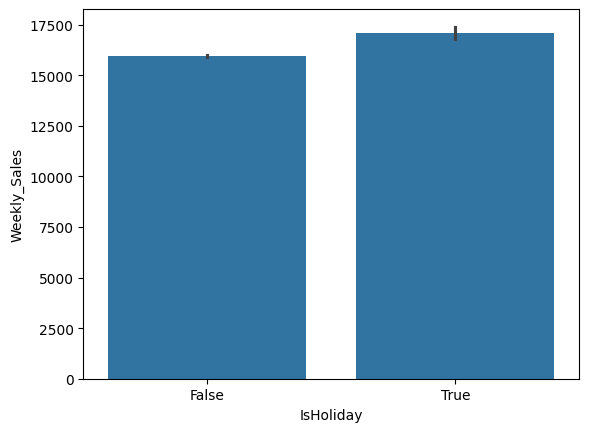

In [ ]:
# sns.barplot(): Cria um gráfico de barras utilizando a biblioteca Seaborn.
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df) # x='IsHoliday': A variável IsHoliday é colocada no eixo X. Ela indica se o período foi um feriado ou não. ='Weekly_Sales': As vendas semanais (Weekly_Sales) são colocadas no eixo Y. data=df: Indica que o DataFrame df contém os dados a serem usados.

In [ ]:
# Filtragem dos Dados: Feriados vs Não Feriados
df_holiday = df.loc[df['IsHoliday'] == True] # df.loc[df['IsHoliday'] == True]: Filtra os dados do DataFrame para selecionar apenas as linhas onde IsHoliday é True (indicando que é feriado).
df_holiday['Date'].unique() # df_holiday['Date'].unique(): Retorna as datas únicas para esses feriados.

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [ ]:
df_not_holiday = df.loc[df['IsHoliday'] == False] #  Filtra os dados para selecionar as semanas não feriadas.
df_not_holiday['Date'].nunique() # Conta o número de datas únicas para as semanas não feriadas.

133

In [ ]:
# Datas dos dias de super Bowl.
df.loc[(df['Date'] == '2010-02-12') | (df['Date'] == '2011-02-11') | (df['Date'] == '2012-02-10'), 'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12') & (df['Date'] != '2011-02-11') & (df['Date'] != '2012-02-10'), 'Super_Bowl'] = False
# As datas do Super Bowl de 2010, 2011 e 2012 são marcadas como True na nova coluna Super_Bowl. Para as outras datas, o valor é False.

In [ ]:
# Datas do dia dos trabalhadores.
df.loc[(df['Date'] == '2010-09-10') | (df['Date'] == '2011-09-09') | (df['Date'] == '2012-09-07'), 'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10') & (df['Date'] != '2011-09-09') & (df['Date'] != '2012-09-07'), 'Labor_Day'] = False
# As datas do Labor Day de 2010, 2011 e 2012 são marcadas como True na nova coluna Labor_Day. Para outras datas, o valor é False.

In [ ]:
# Datas dos dias de ação de graças.
df.loc[(df['Date'] == '2010-11-26') | (df['Date'] == '2011-11-25'), 'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26') & (df['Date'] != '2011-11-25'), 'Thanksgiving'] = False
# As datas de Thanksgiving de 2010 e 2011 são marcadas como True na nova coluna Thanksgiving. As outras datas são False.

In [ ]:
# Datas dos dias de natal.
df.loc[(df['Date'] == '2010-12-31') | (df['Date'] == '2011-12-30'), 'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31') & (df['Date'] != '2011-12-30'), 'Christmas'] = False
# As datas de Christmas de 2010 e 2011 são marcadas como True na nova coluna Christmas, e as outras datas recebem False.

# *15- Visualização dos Feriados Específicos.*

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

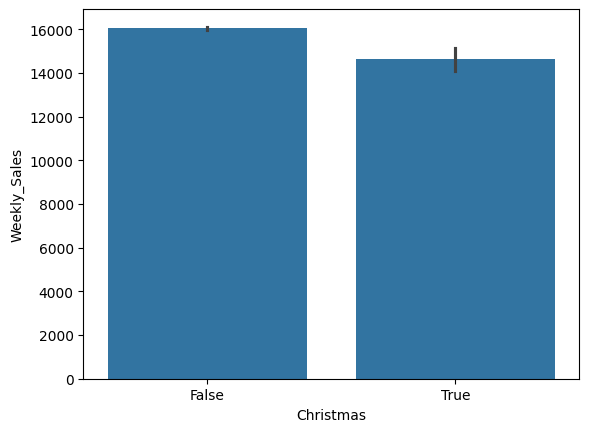

In [ ]:
# Gerando gráfico de barras nos dias de natal.
sns.barplot(x='Christmas', y='Weekly_Sales', data=df)
# x='Christmas': Exibe se a data é Natal (True ou False). y='Weekly_Sales': Exibe as vendas semanais.

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

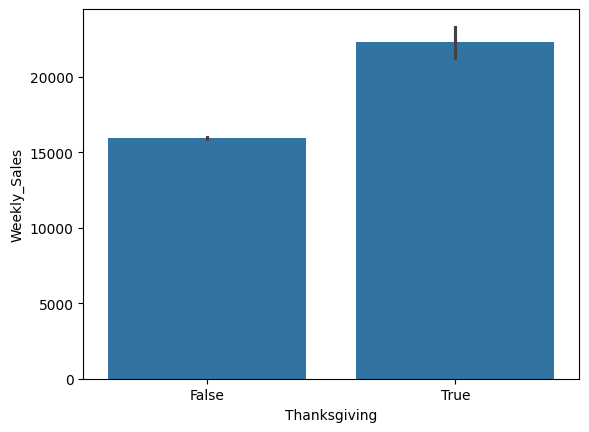

In [ ]:
# Gerando gráfico de barras nos dias de ações de graças.
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df)
# x='Thanksgiving': Exibe se a data é Ação de Graças. y='Weekly_Sales': Exibe as vendas semanais.

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

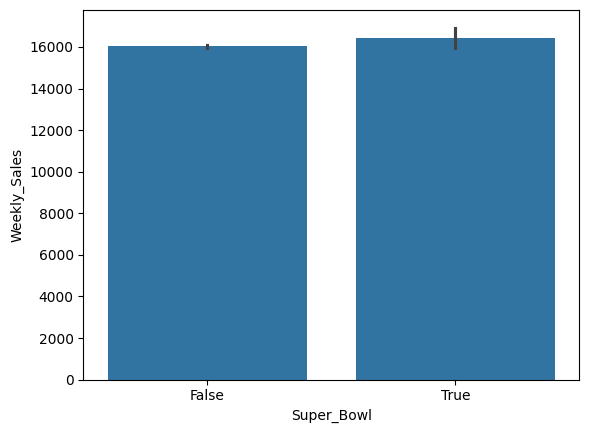

In [ ]:
# Gerando gráfico de barras nos dias de Super Bowl.
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df)
# x='Super_Bowl': Exibe se a data é Super Bowl . y='Weekly_Sales': Exibe as vendas semanais.

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

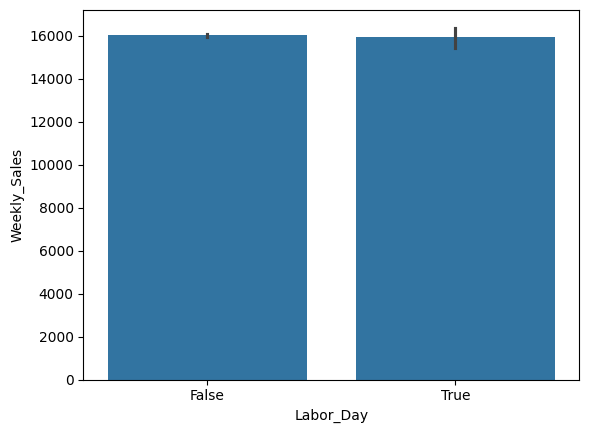

In [ ]:
# Gerando gráfico nos dias dos trabalhadores.
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df)
# x='Labor_Day': Exibe se a dados é Dia do Trabalho . y='Weekly_Sales': Exibe as vendas semanais.

# *16- :Vendas em cada tipo de feriados.*

In [ ]:
# Média de vendas semanais nos dia de Natal.
df.groupby(['Christmas', 'Type'])['Weekly_Sales'].mean()
# df.groupby(['Christmas', 'Type']): Agrupar osferiado (Natal)e pelo tipo de loja ( Type). Christmasé uma coluna diminuir se a data é feriadNatal (Verdadeiro ou Falso) Typeindica o tipo de loja. ['Weekly_Sales'].mean(): Calcular a **média das vemédia das vendas semanais para cada combinação de Christmase Typede loja.

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [ ]:
# Médias de vendas semanais nos dias dos trabalhadores.
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [ ]:
# Média de vendas semanais nos Dias de Ação de Graças.
df.groupby(['Thanksgiving', 'Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [ ]:
# Média de vendas semanais nos dia de Super Bowl.
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

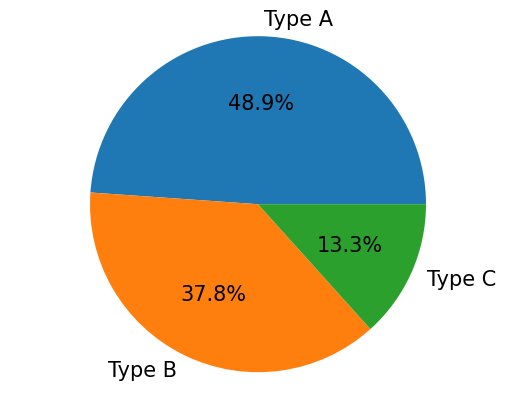

In [ ]:
my_data = [48.88, 37.77 , 13.33 ]  # Representa Percentuais.
my_labels = 'Type A','Type B', 'Type C' # rótulos para os tipos de lojas.
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) # Criando gráficos de pizza com percentuais.
plt.axis('equal') # Garante que o gráfico de pizza seja circular
mpl.rcParams.update({'font.size': 20}) # Aumenta o tamanho da fonte dos percentuais

plt.show()

In [ ]:
# Média de Vendas Semanais em Feriados.
df.groupby('IsHoliday')['Weekly_Sales'].mean()
# df.groupby('IsHoliday'): Grupo de dados com base na coluna **`IsHolIsHoliday(indica se o período foi feriaados. ['Weekly_Sales'].mean(): Calcular a média davendas semanais para feriados e não feriados.

,Weekly_Sales
IsHoliday,
False,15952.816352
True,17094.300918


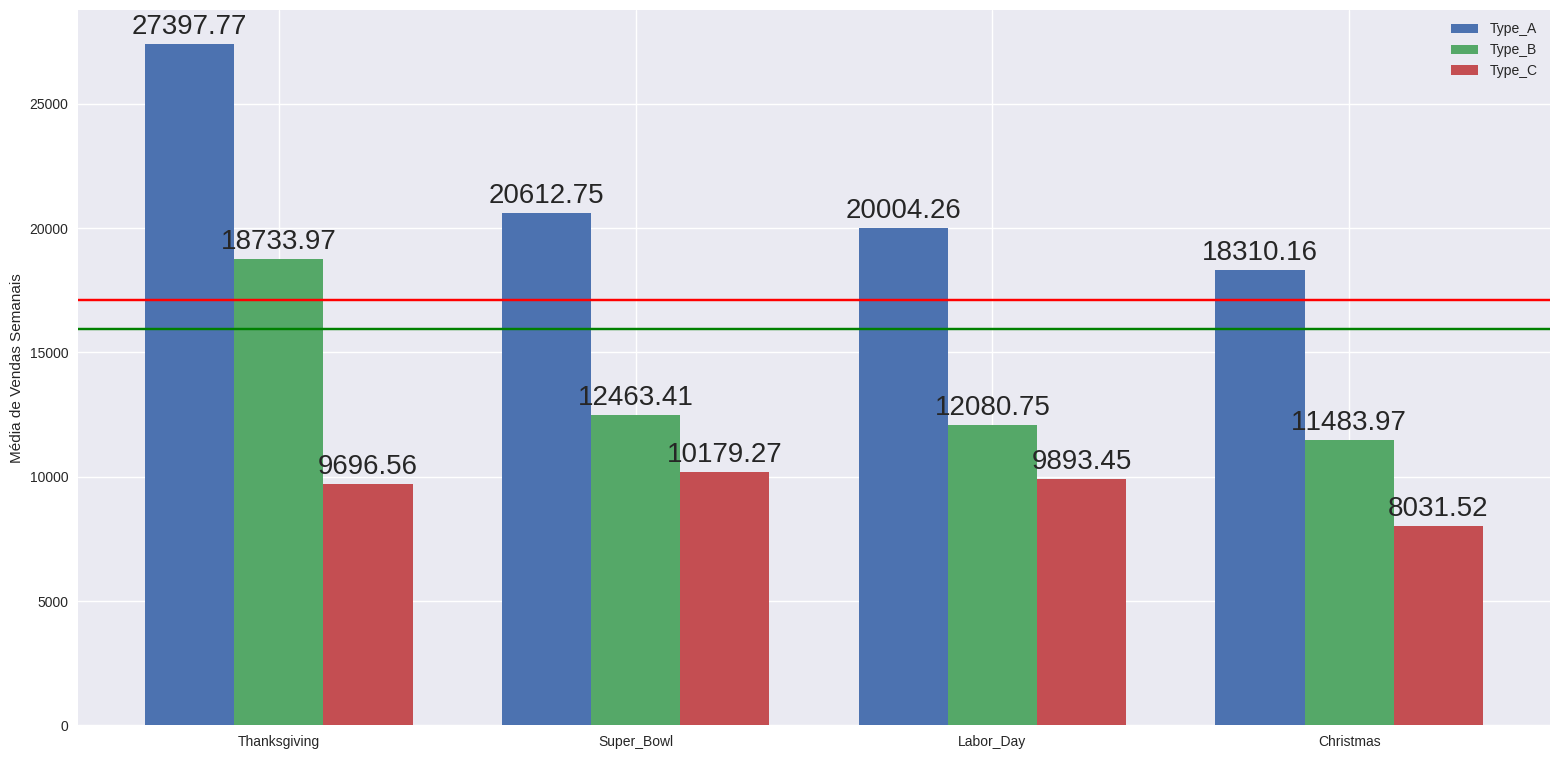

In [ ]:
# Traçando vendas médias semanais.
plt.style.use('seaborn-v0_8') # Configura o estilo do gráfico para torná-lo mais atrativo, com um design consistente do Seaborn.
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas'] # Define os rótulos (nomes dos feriados) que serão mostrados no eixo X do gráfico.
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56, 10179.27, 9893.45, 8031.52]
# São listas que armazenam as médias das vendas semanais para os tipos de lojas (A, B e C) em cada feriado.

x = np.arange(len(labels))  # Posições no eixo X
width = 0.25  # Largura das barras

fig, ax = plt.subplots(figsize=(16, 8)) # Cria a figura e o eixo principal do gráfico, configurando um tamanho maior (16x8) para a exibição.

# Plotando as barras para os tipos A, B, e C
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x, B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Adicionando rótulos e título
ax.set_ylabel('Média de Vendas Semanais')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Define uma função para adicionar o valor de cada barra como texto acima dela. Isso ajuda a visualizar os números diretamente.
def autolabel(rects):
    """Adicionar rótulos de texto acima das barras."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Deslocamento vertical de 3 pontos
                    textcoords="offset points",
                    ha='center', va='bottom')

# Nomea às barras de cada tipo de loja.
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Linha horizontal indicando a média das vendas para feriados e não feriados
plt.axhline(y=17094.30, color='r')  # Média de vendas nos feriados
plt.axhline(y=15952.82, color='green')  # Média de vendas nas semanas não feriadas

fig.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show() # Exibe o gráfico


In [ ]:
# Visualizando os 5 Maiores Valores de Vendas Semanais.
df.sort_values(by='Weekly_Sales', ascending=False).head(5) # df.sort_values(by='Weekly_Sales', ascending=False): Ordena o DataFrame df pelas vendas semanais de forma decrescente (do maior para o menor).

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


# *17- Visualizando a relação de tamanho e tipo.*

In [ ]:
# Agrupando os dados no DataFrame, com base na colua 'Type', os tipos de lojas, a coluna 'Size' calcula estatísticas descritivas, .round(2) para arredondar os resultados para duas casas decimais.
df_store.groupby('Type').describe()['Size'].round(2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


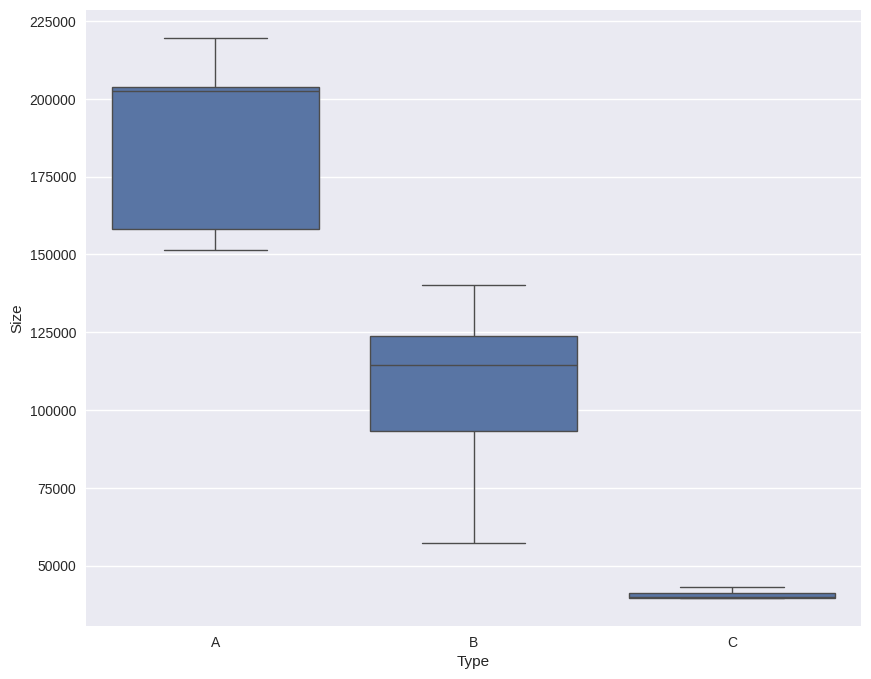

In [ ]:
# Configurando o gráfico.
plt.figure(figsize=(10,8))  # Definindo o tamanho da área do gráfico como 10 unidades de largura por 8 de altura.
ig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False) # Cria um boxplot utilizando Seaborn para mostrar a distribuição dos tamanhos ('Size') das lojas por tipo ('Type').

# *18- Colunas de redução.*

In [ ]:
# Verificar valores nulos no DataFrame
df.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270031
MarkDown2,309308
MarkDown3,283561


In [ ]:
#  Preencher valores nulos com zero
df = df.fillna(0)

In [ ]:
# Verificar novamente valores nulos
df.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [ ]:
# Resumo estatístico do DataFrame
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


# *19- Análise mais profunda das vendas.*

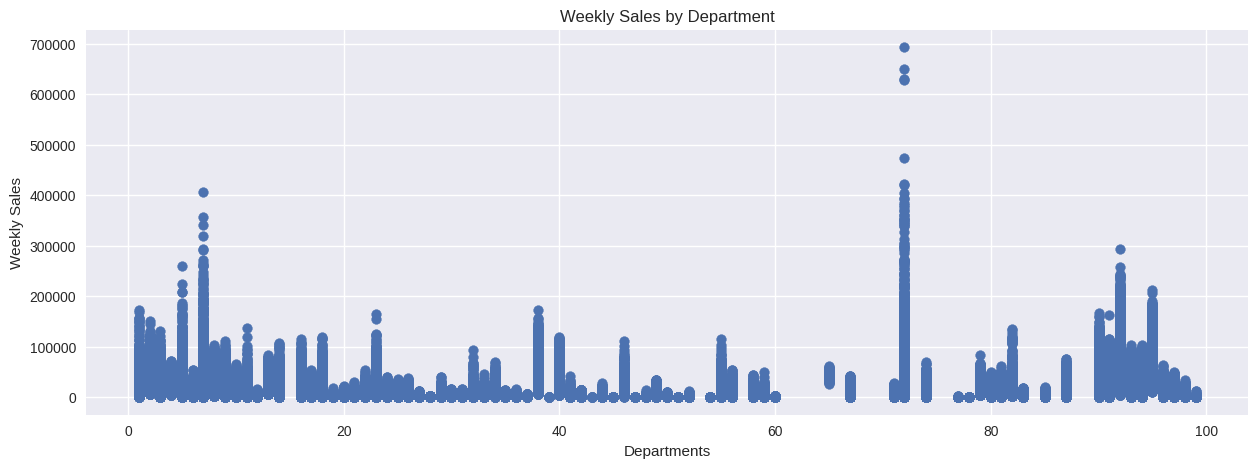

In [ ]:
# Gráfico de dispersão das vendas semanais por departamento.
x = df['Dept'] # Seleciona a coluna de departamentos como eixo X.
y = df['Weekly_Sales'] # Seleciona as vendas semanais como eixo Y.
plt.figure(figsize=(15,5)) # Define o tamanho da figura.
plt.title('Weekly Sales by Department') # Definir título do eixo.
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y) # Plota os pontos de dispersão (scatter plot) para visualizar a relação entre departamentos e vendas.
plt.show() # Mostra o gráfico na tela.

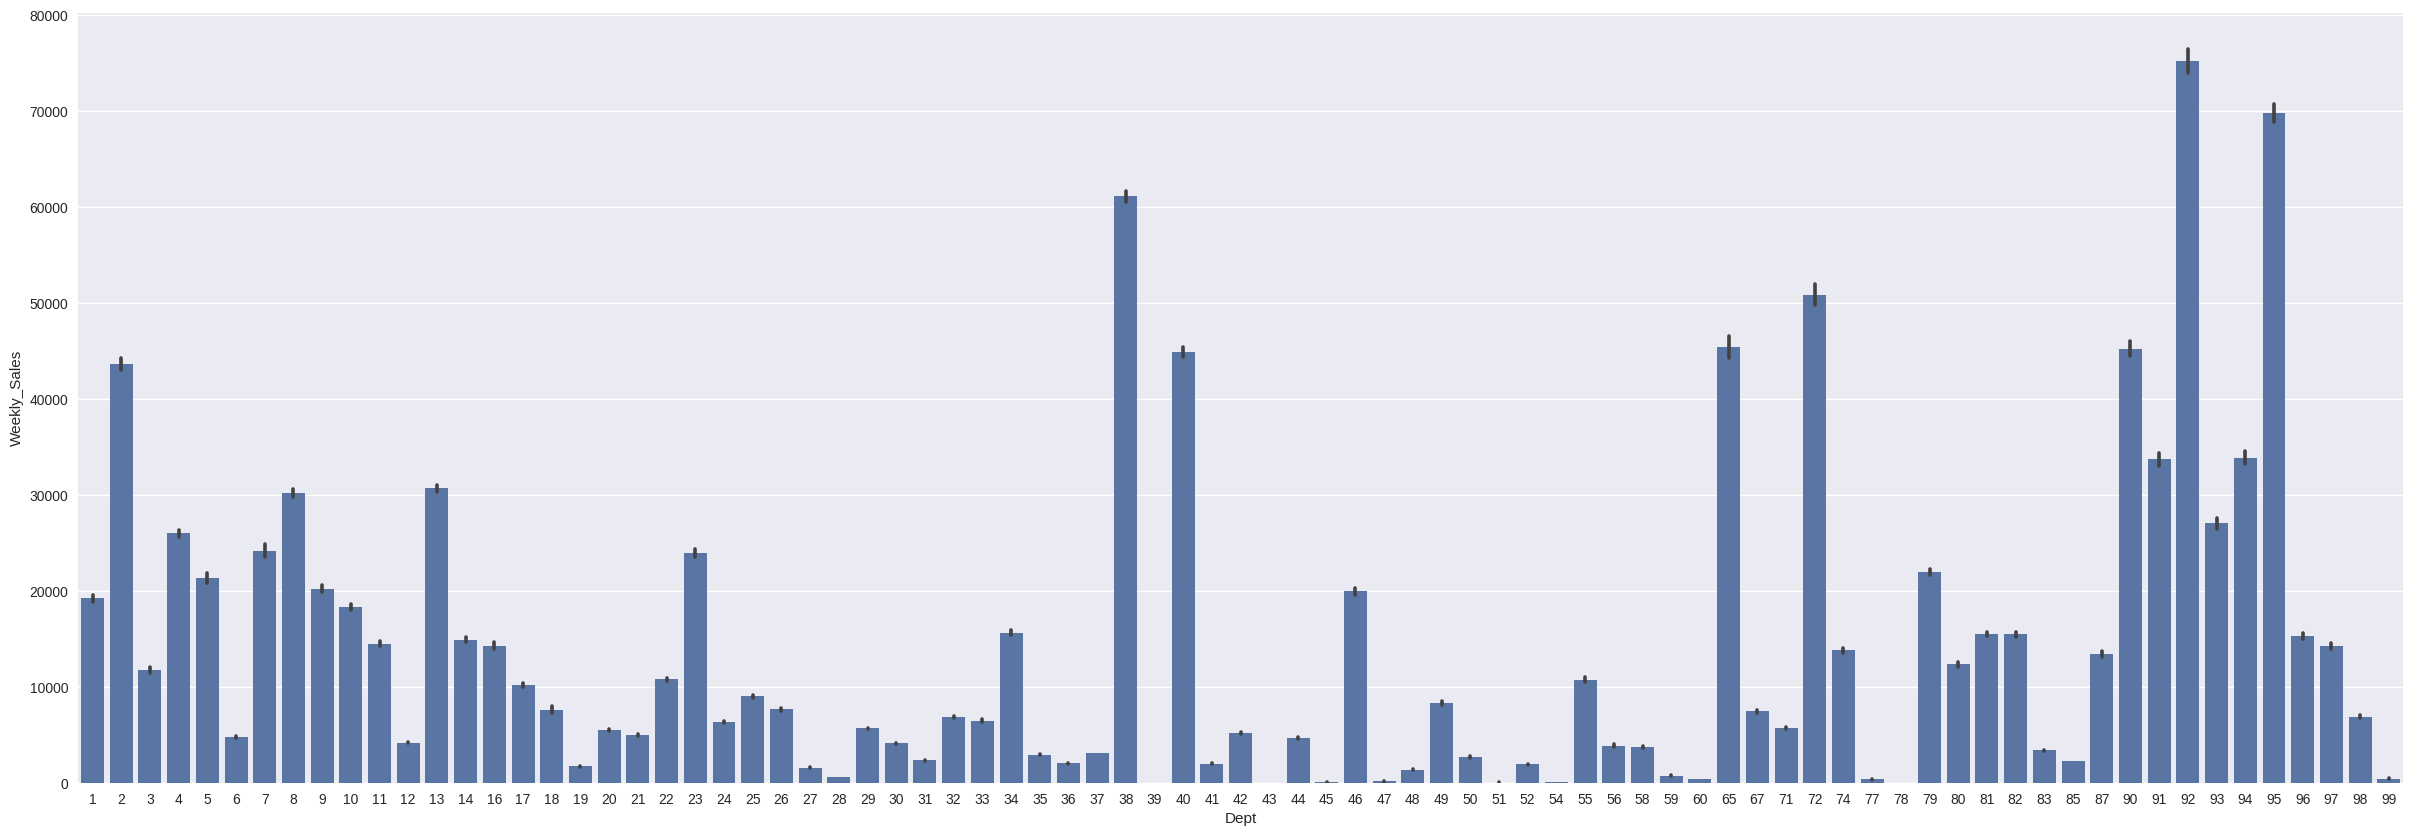

In [ ]:
# Gráfico de barras das vendas semanais por departamento
plt.figure(figsize=(30,10)) # Ajusta o tamanho da figura para um layout maior.
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df) # Plota as barras para mostrar a média das vendas semanais por departamento. Por padrão, o sns.barplot calcula a média dos valores para cada categoria.

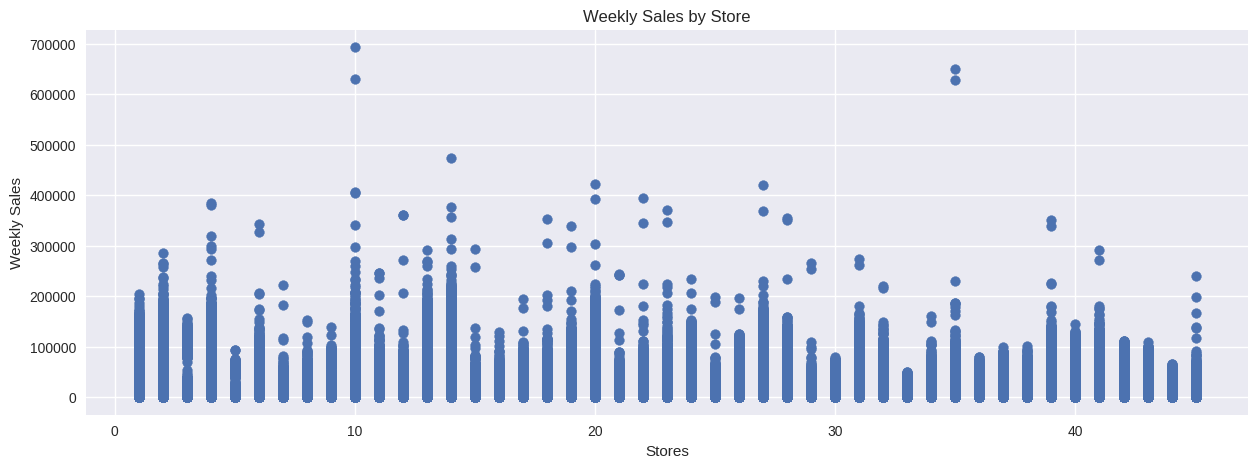

In [ ]:
# Gráfico de dispersão das vendas semanais por loja.
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

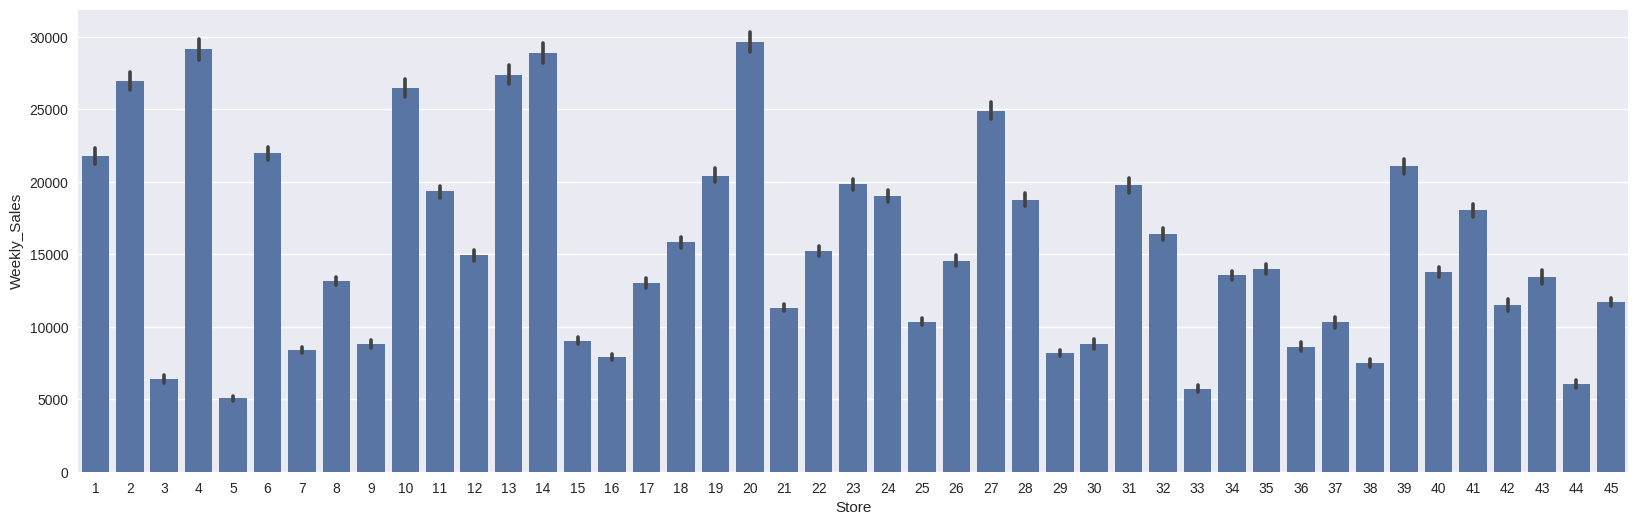

In [ ]:
# Gráfico de barras das vendas semanais por loja.
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

# *20- Alterando data, para data e hora e criando novas colunas.*

In [ ]:
# Conversão de data para hora.
df["Date"] = pd.to_datetime(df["Date"]) # Converte a coluna Date em formato string para um formato de data no pandas.
df['week'] = df['Date'].dt.isocalendar().week # Extrai a semana do ano (número de 1 a 52) da data.
df['month'] = df['Date'].dt.month # Extrai o mês (número de 1 a 12).
df['year'] = df['Date'].dt.year # Extrai o ano.

In [ ]:
# Média de vendas semanais por mês
df.groupby('month')['Weekly_Sales'].mean()

,Weekly_Sales
month,
1,14182.239153
2,16048.701191
3,15464.817698
4,15696.435193
5,15845.556200
6,16397.605478
7,15905.472425
8,16113.800069
9,15147.216063


In [ ]:
# Média de vendas semanais por ano.
df.groupby('year')['Weekly_Sales'].mean()

,Weekly_Sales
year,
2010,16318.648285
2011,16007.797985
2012,15748.265005


<Axes: xlabel='month'>

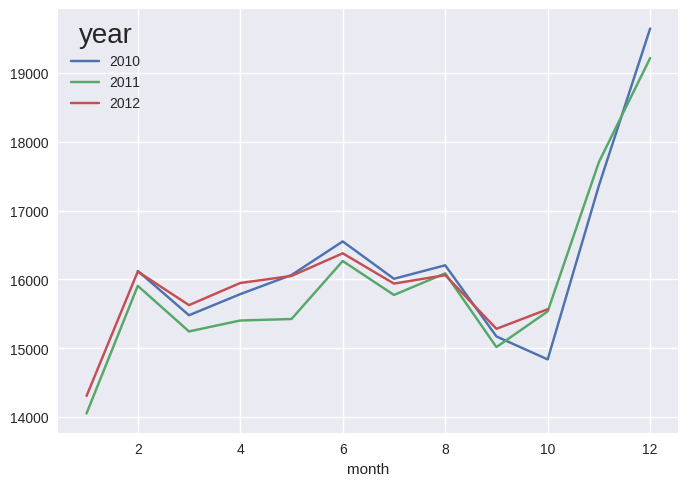

In [ ]:
#  Tabela dinâmica de vendas mensais por ano.
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month")
monthly_sales.plot()

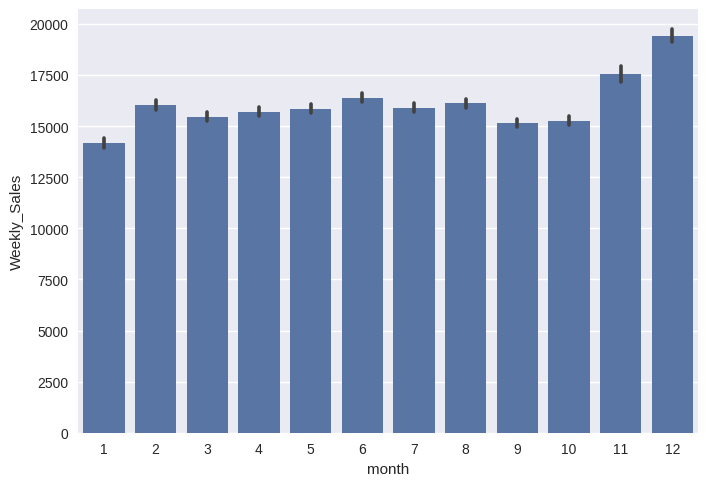

In [ ]:
# Gráfico de barras para vendas semanais por mês.
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

In [ ]:
#  Vendas semanais organizadas pela semana do ano.
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

,Weekly_Sales
week,
51,26454.164116
47,22269.601768
50,20478.421134
49,18731.794840
22,16856.650245


<Axes: xlabel='week'>

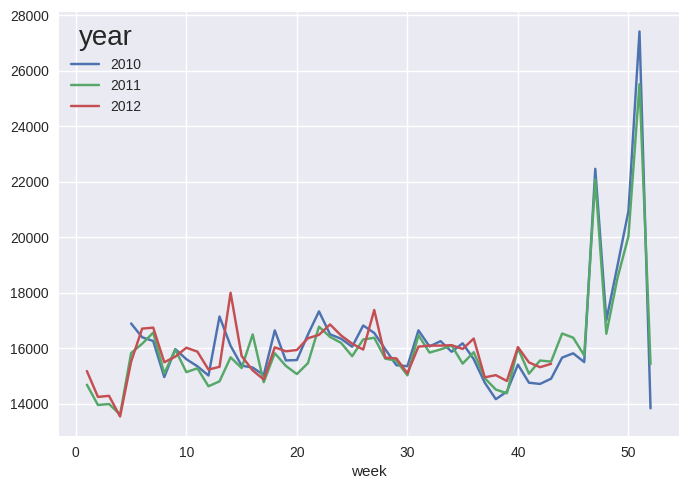

In [ ]:
# Tabela dinâmica de vendas semanais por ano.
weekly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="week")
weekly_sales.plot()

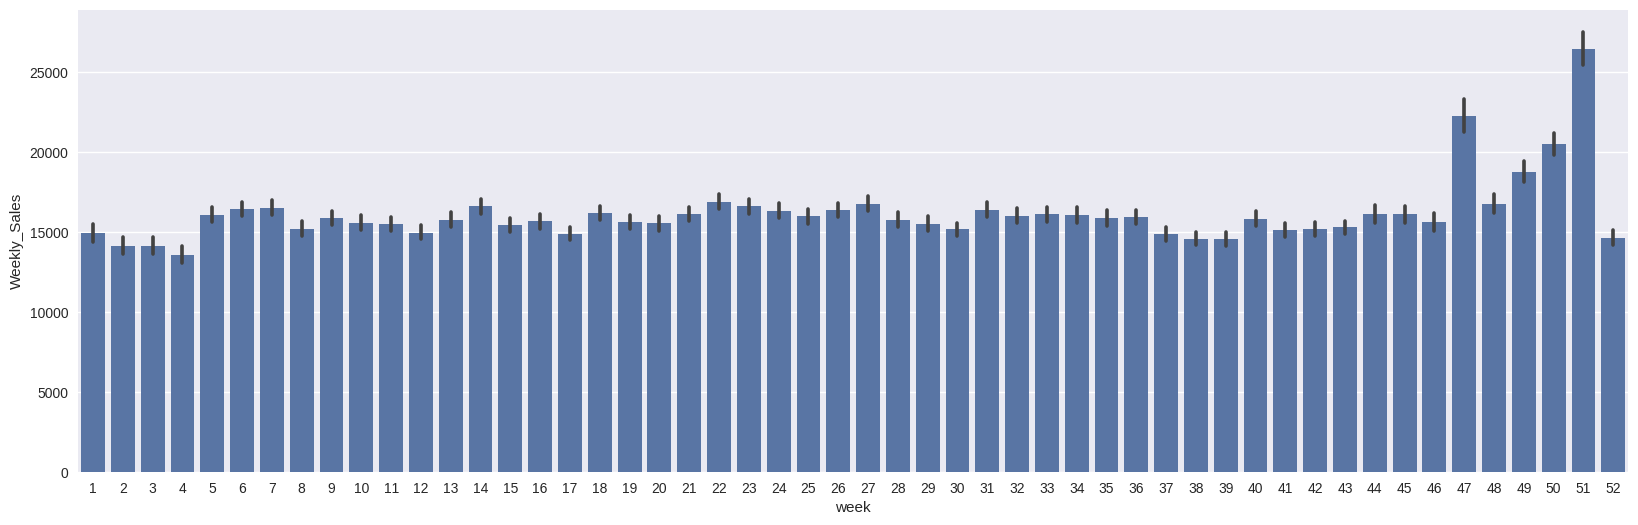

In [ ]:
# Gráfico de barras para vendas semanais por semana.
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

# *21- Preço do combustível, IPC, desemprego, efeitos da temperatura.*

<Axes: xlabel='Fuel_Price'>

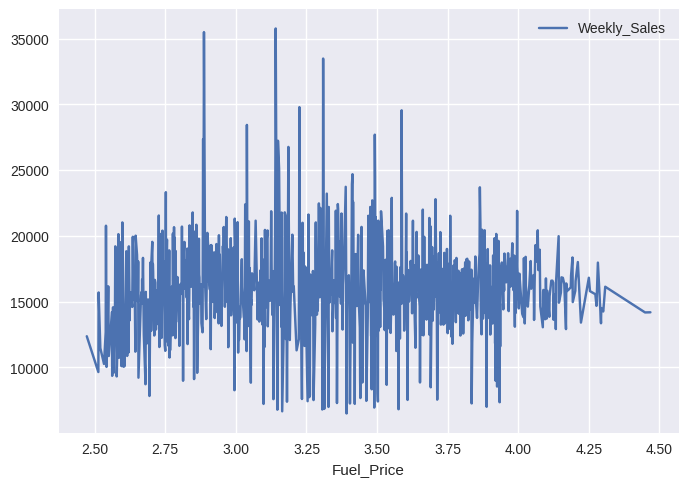

In [ ]:
# Relação entre preços de combustível e vendas semanais.
fuel_price = pd.pivot_table(df, values="Weekly_Sales", index="Fuel_Price") # Os preços do combustível são usados como índice. As vendas semanais são os valores.
fuel_price.plot()

<Axes: xlabel='Temperature'>

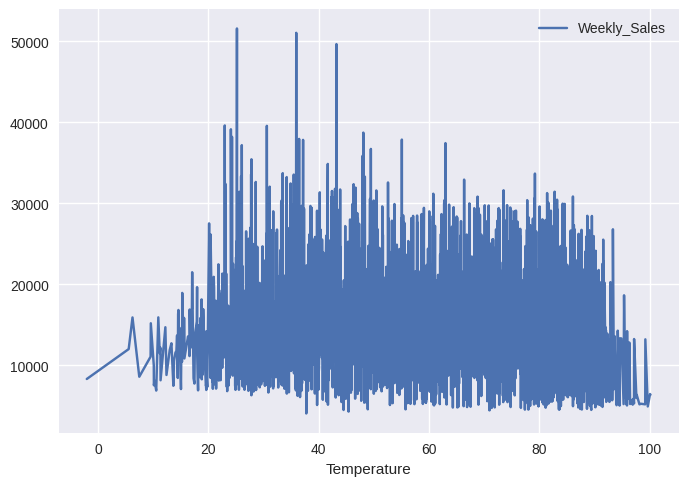

In [ ]:
#  Relação entre temperatura e vendas semanais.
temp = pd.pivot_table(df, values="Weekly_Sales", index="Temperature")
temp.plot()

<Axes: xlabel='CPI'>

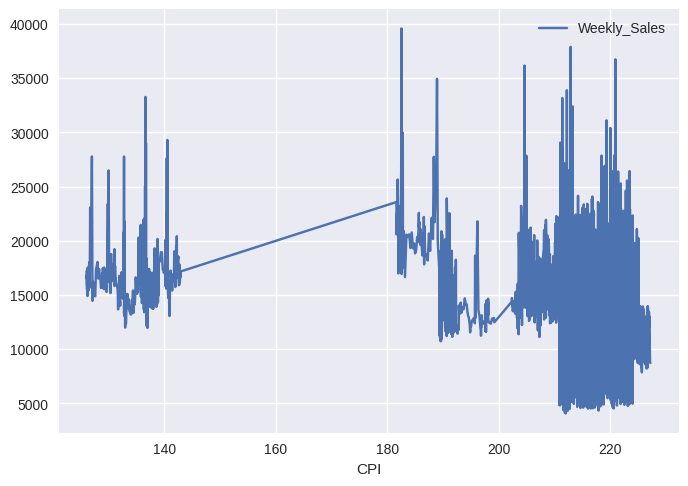

In [ ]:
# Relação entre o CPI (Índice de Preços ao Consumidor) e vendas semanais.
CPI = pd.pivot_table(df, values="Weekly_Sales", index="CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

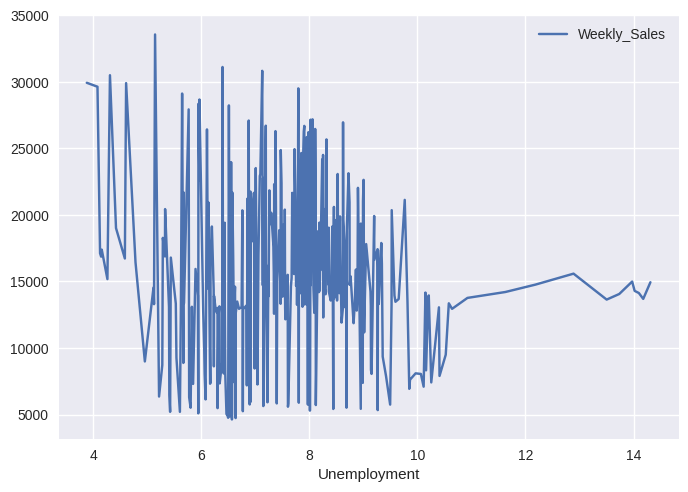

In [ ]:
# Relação entre taxa de desemprego e vendas semanais.
unemployment = pd.pivot_table(df, values="Weekly_Sales", index="Unemployment")
unemployment.plot()

In [ ]:
# Exportação dos dados processados.
df.to_csv('clean_data.csv') # Exporta o dataframe processado para um arquivo CSV chamado clean_data.csv.

# *22- Explorações e descobertas.*

In [ ]:
# Configuração para exibir até 100 colunas no console.
pd.options.display.max_columns = 100

In [ ]:
# Lê o arquivo CSV contendo os dados processados.
df = pd.read_csv('./clean_data.csv')

In [ ]:
# Remove a coluna indesejada do dataframe.
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Converte a coluna 'Date' para formato datetime.
df['Date'] = pd.to_datetime(df['Date'])

# *23- Codificando os dados.*

In [ ]:
# Criar uma cópia do dataframe original.
df_encoded = df.copy()

In [ ]:
# Criando dicionário.
type_group = {'A': 1, 'B': 2, 'C': 3}  # Dicionário para codificar os tipos de loja.
df_encoded['Type'] = df_encoded['Type'].replace(type_group)  # Substituir valores.

In [ ]:
# Converte True/False para 0/1.
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int)

In [ ]:
# Converte True/False para 0/1.
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int)

In [ ]:
# Converte True/False para 0/1.
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int)

In [ ]:
# Converte True/False para 0/1.
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int)

In [ ]:
# Converte True/False para 0/1.
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int)

In [ ]:
# Cria outra cópia do dataframe codificado.
df_new = df_encoded.copy()

# *24- Observação de interações entre recursos.*

In [ ]:
#  Remoção de colunas específicas relacionadas a feriados.
drop_col = ['Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas']  # Lista com os nomes das colunas a serem removidas.
df_new.drop(drop_col, axis=1, inplace=True) # axis=1 Especifica que as colunas (e não linhas) serão removidas. inplace=True: Aplica as mudanças diretamente no dataframe sem necessidade de atribuí-lo novamente.

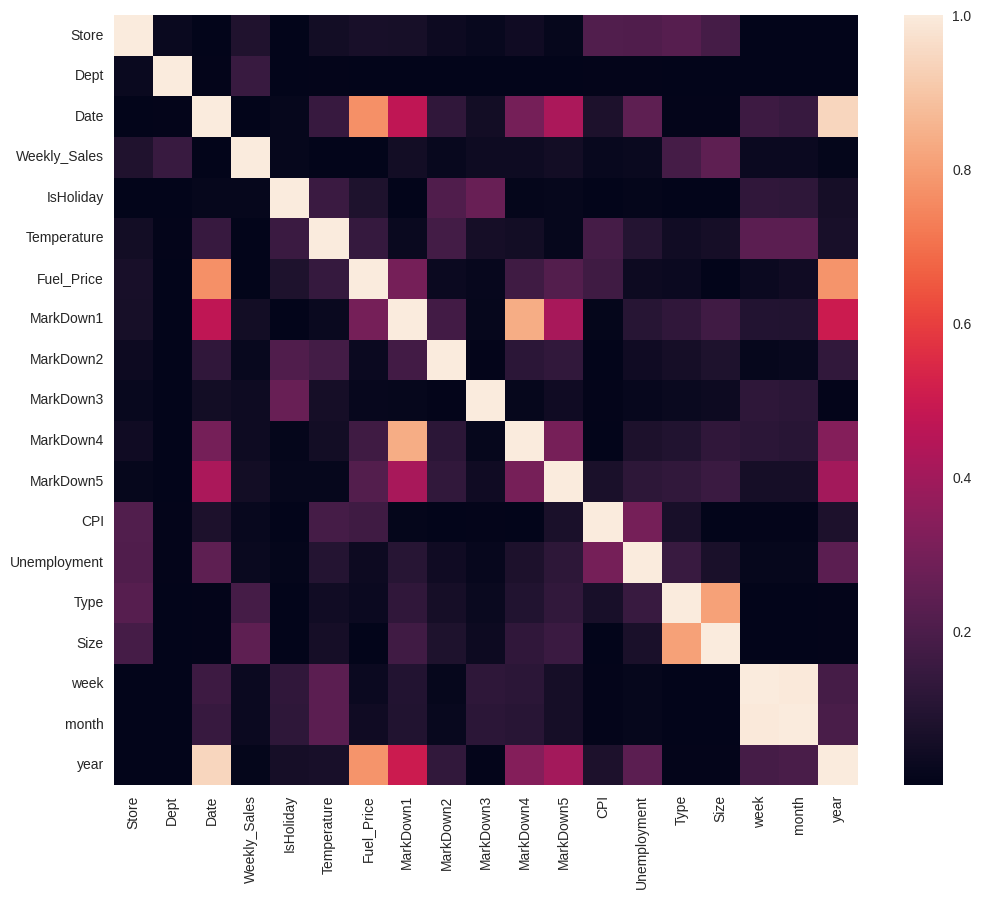

In [ ]:
# Mapa de calor de correlações.
plt.figure(figsize=(12,10))  # Define o tamanho da figura
sns.heatmap(df_new.corr().abs())  # Visualiza a matriz de correlação com valores absolutos
plt.show()

In [ ]:
# Remoção de variáveis adicionais.
rop_col = ['Temperature', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
df_new.drop(rop_col, axis=1, inplace=True)  # Removendo mais colunas. # 'drop_col' foi alterado para 'rop_col'


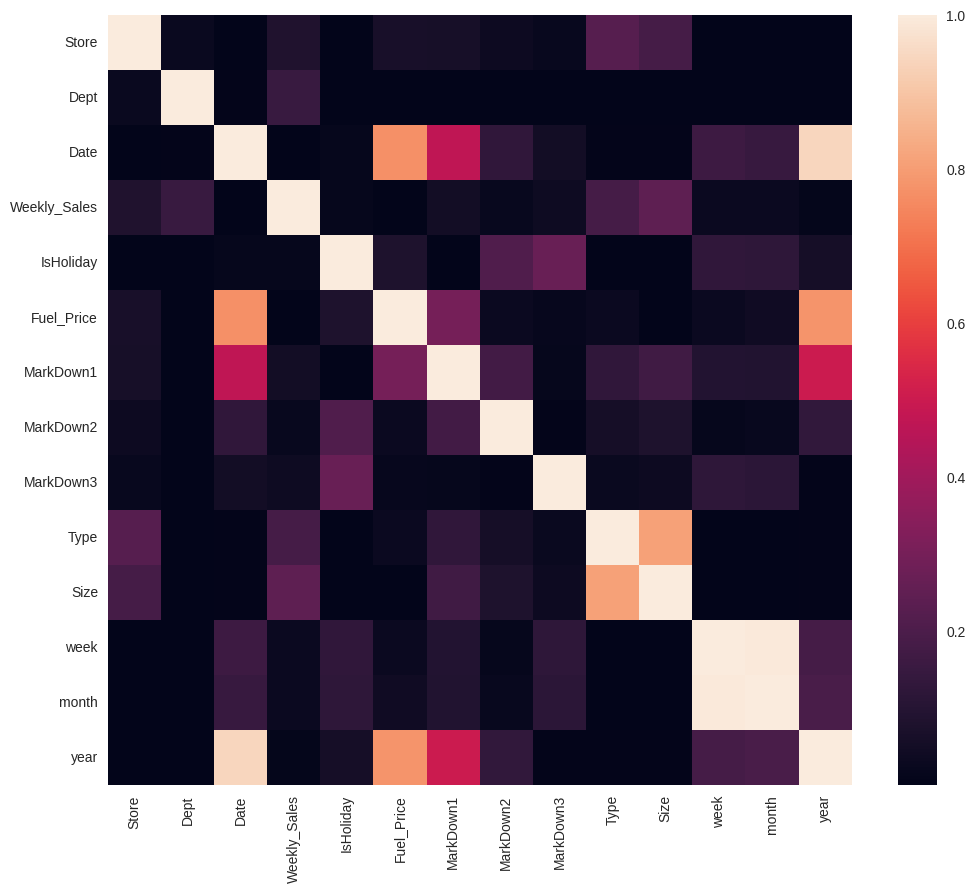

In [ ]:
#  Mapa de calor atualizado sem as colunas removidas.
plt.figure(figsize=(12,10))
sns.heatmap(df_new.corr().abs())
plt.show()

In [ ]:
# Ordenação por data.
df_new = df_new.sort_values(by='Date', ascending=True)  # Ordenando por data em ordem crescente

# *25- Criando divisões de treino e testes.*

In [ ]:
#  Divisão dos dados em conjunto de treinamento e teste.

train_data = df_new[:int(0.7*(len(df_new)))]  # Conjunto de treinamento (70% dos dados).
test_data = df_new[int(0.7*(len(df_new))):]  # Conjunto de teste (30% dos dados).

# Separação entre variáveis independentes e alvo.

target = "Weekly_Sales"  # A coluna alvo (variável dependente).
used_cols = [c for c in df_new.columns.to_list() if c not in [target]]  # Todas as outras colunas.

# Divisão entre X (variáveis independentes) e y (variável dependente).

X_train = train_data[used_cols]  # Variáveis preditoras do conjunto de treinamento.
X_test = test_data[used_cols]  # Variáveis preditoras do conjunto de teste.
y_train = train_data[target]  # Alvo do conjunto de treinamento.
y_test = test_data[target]  # Alvo do conjunto de teste.
X = df_new[used_cols]  # Para manter todas as variáveis preditoras juntas.

In [ ]:
#  Remoção da coluna de datas.
X_train = X_train.drop(['Date'], axis=1)  # Removendo a coluna de data do conjunto de treinamento.
X_test = X_test.drop(['Date'], axis=1)  # Removendo a coluna de data do conjunto de teste.

# *26- Definindo função de métrica.*

In [ ]:
# Essa função calcula o Weighted Mean Absolute Error (WMAE) para avaliar as previsões feitas pelo modelo, levando em consideração o peso adicional para as semanas de feriados.
def wmae_test(test, pred):
    weights = X_test['IsHoliday'].apply(lambda is_holiday: 5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

# *27- Configurando o Random Forest Regressor.*

In [ ]:
rf = RandomForestRegressor(
    n_estimators=50, # Número de árvores na floresta (Aumentar pode melhorar a precisão, mas aumenta o tempo de execução).
    random_state=42, # Define uma semente aleatória para resultados reproduzíveis.
    n_jobs=-1, # Utiliza todos os núcleos do processador para paralelizar a execução.
    max_depth=35, # Profundidade máxima de cada árvore (Limita o crescimento para evitar overfitting).
    max_features='sqrt', # Número máximo de recursos considerados para encontrar a melhor divisão (Raiz quadrada dos recursos).
    min_samples_split=10 # Número mínimo de amostras exigido para dividir um nó.
)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() # Escalador robusto para lidar com outliers ao normalizar os dados.

# Cria um pipeline que inclui o escalador e o modelo de regressão
pipe = make_pipeline(scaler, rf)
# Ajusta o pipeline nos dados de treino
pipe.fit(X_train, y_train)
# Faz previsões no conjunto de treino
y_pred = pipe.predict(X_train)
# Faz previsões no conjunto de teste
y_pred_test = pipe.predict(X_test)

In [ ]:
wmae_test(y_test, y_pred_test)

5697.712824122053

# *28- Vendo a importância dos recursos.*

In [ ]:
# Removendo a coluna 'Date' do conjunto de dados X
X = X.drop(['Date'], axis=1)

Feature ranking:
1. feature 1 (0.734834)
2. feature 8 (0.103608)
3. feature 0 (0.058842)
4. feature 7 (0.039401)
5. feature 9 (0.021299)
6. feature 3 (0.018655)
7. feature 10 (0.008636)
8. feature 6 (0.005390)
9. feature 4 (0.003045)
10. feature 5 (0.002715)
11. feature 2 (0.002032)
12. feature 11 (0.001543)


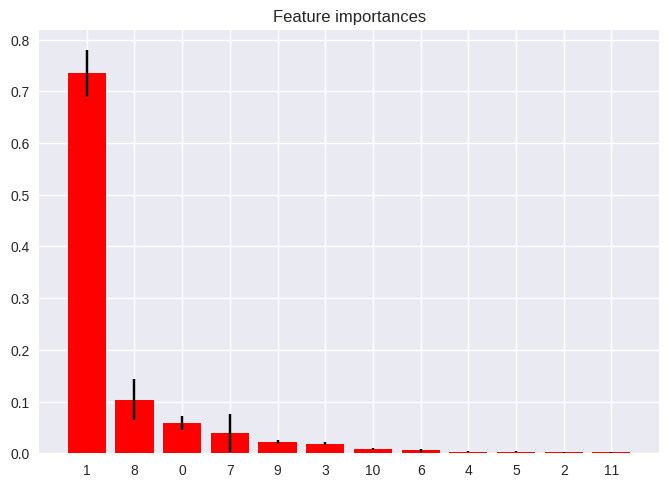

In [ ]:
# Importância das Classificação de Recursos.

importances = rf.feature_importances_ # Lista a importância atribuída a cada característica do modelo. Este valor reflete o quanto cada característica contribuiu para a redução da impureza nas árvores.
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # Calcula o desvio padrão da importância entre todas as árvores, ajudando a avaliar a variação.
indices = np.argsort(importances)[::-1] # Ordena as importâncias das características em ordem decrescente.

# Printing da classificação de recuros.
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


# Traçando as importâncias dos recursos do the florest.

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Ajustes no Conjunto de Dados.
X1_train = X_train.drop(['month'], axis=1) # Removendo a coluna 'month' do conjunto de treino.
X1_test = X_test.drop(['month'], axis=1) # Removendo a coluna 'month' do conjunto de teste.

# *29- Modelo dos dados novamente sem mês.*

In [ ]:
rf = RandomForestRegressor(
    n_estimators=50,           # Número de árvores no modelo.
    random_state=42,           # Garante reprodutibilidade dos resultados.
    n_jobs=-1,                 # Usa todos os núcleos do processador para acelerar o treinamento.
    max_depth=35,              # Limita a profundidade máxima das árvores.
    max_features='sqrt',       # Número máximo de características para cada divisão (raiz quadrada do total).
    min_samples_split=10       # Número mínimo de amostras exigido para dividir um nó.
)
scaler = RobustScaler()        # Definição do Escalador.
pipe = make_pipeline(scaler, rf) # Criação do Pipeline.
pipe.fit(X1_train, y_train)      # Treinamento do Pipeline.
y_pred = pipe.predict(X1_train)  # Previsões no Conjunto de Treinamento.
y_pred_test = pipe.predict(X1_test) # Previsões no Conjunto de Teste.

In [ ]:
wmae_test(y_test, y_pred_test)

5450.408821519322

# *30- Modelo com os dados inteiros.*

In [ ]:
# Divisão dos Dados em Conjuntos de Treino e Teste.
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

In [ ]:
# Definição do Alvo e das Features.
target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]]

In [ ]:
# Separação de Features e Alvo.
X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [ ]:
# Para unir as divisões de treino e teste.
X_enc = df_encoded[used_cols1]

In [ ]:
# Verifica se 'Date' está nas colunas antes de remover
if 'Date' in X_enc.columns:
    X_enc = X_enc.drop(['Date'], axis=1)
else:
    print("Coluna 'Date' não encontrada no DataFrame")

In [ ]:
# Removendo a coluna 'Date' do treino e teste (se existir)
if 'Date' in X_train_enc.columns:
    X_train_enc = X_train_enc.drop(['Date'], axis=1)
if 'Date' in X_test_enc.columns:
    X_test_enc = X_test_enc.drop(['Date'], axis=1)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=50,           # Número de árvores no modelo (50 árvores).
    random_state=42,           # Garante que o resultado seja reprodutível.
    n_jobs=-1,                 # Usa todos os núcleos do processador disponíveis para acelerar o treinamento.
    max_depth=35,              # Limita a profundidade máxima das árvores.
    max_features='sqrt',       # Usa a raiz quadrada do número total de características para cada divisão de nó.
    min_samples_split=10       # Define que, para dividir um nó, é necessário no mínimo 10 amostras.
)

scaler = RobustScaler() # Definição do Escalador.
pipe = make_pipeline(scaler, rf) # Criação do Pipeline.
pipe.fit(X_train_enc, y_train_enc) # Treinamento do Pipeline.
y_pred_enc = pipe.predict(X_train_enc) # Previsões no Conjunto de Treinamento.
y_pred_test_enc = pipe.predict(X_test_enc) # Previsões no Conjunto de Teste.

In [ ]:
wmae_test(y_test_enc, y_pred_test_enc)

2684.1200397952525

# **31- Importância do recurso para todo o conjunto de dados codificados.**

Feature ranking:
1. feature 1 (0.743021)
2. feature 13 (0.073903)
3. feature 12 (0.040787)
4. feature 0 (0.033258)
5. feature 10 (0.030062)
6. feature 11 (0.017276)
7. feature 18 (0.011946)
8. feature 3 (0.011041)
9. feature 4 (0.010113)
10. feature 19 (0.005986)
11. feature 7 (0.004673)
12. feature 9 (0.003993)
13. feature 8 (0.003554)
14. feature 5 (0.003447)
15. feature 6 (0.002533)
16. feature 20 (0.001175)
17. feature 16 (0.001059)
18. feature 2 (0.000916)
19. feature 17 (0.000683)
20. feature 15 (0.000301)
21. feature 14 (0.000272)


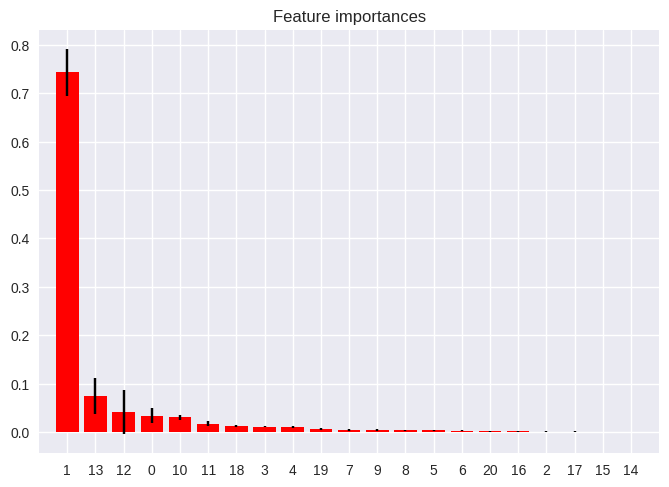

In [ ]:
importances = rf.feature_importances_ # Extração das Importâncias das Características.
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)                          # Cálculo do Desvio Padrão das Importâncias.
indices = np.argsort(importances)[::-1] # Ordenação das Características por Importância.

# Impressão das Características Ordenadas.
print("Feature ranking:")

for f in range(X_enc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotagem das Importâncias das Características.
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_enc.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_enc.shape[1]), indices)
plt.xlim([-1, X_enc.shape[1]])
plt.show()

In [ ]:
# Criação de uma Cópia do DataFrame.
df_encoded_new = df_encoded.copy()  # criando uma cópia dos dados codificados para mantê-los sem alterações.
df_encoded_new.drop(drop_col, axis=1, inplace=True)  # removendo as colunas especificadas em 'drop_col'

# **32- Modelo de acordo com a importância do recurso.**

In [ ]:
# Divisão dos Dados: Treinamento e Teste.
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

# Definindo a Variável-Alvo e as Independentes.
target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] # todas as colunas, exceto a variável alvo

#  Separação dos Dados em Entradas (X) e Saídas (y).
X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

# Exclusão da Coluna Date.
X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1 = X_test_enc1.drop(['Date'], axis=1)

In [ ]:
# Configuração do Modelo.
rf = RandomForestRegressor(
    n_estimators=50,
    random_state=42,
    n_jobs=-1,
    max_depth=40,
    max_features='log2',
    min_samples_split=10
)

# Escalonamento com RobustScaler.
scaler = RobustScaler()

# Criação do Pipeline.
pipe = make_pipeline(scaler, rf)

# Treinamento do Modelo.
pipe.fit(X_train_enc1, y_train_enc1)
# Predições no Conjunto de Treinamento.
y_pred_enc = pipe.predict(X_train_enc1)
# Predições no Conjunto de Teste.
y_pred_test_enc = pipe.predict(X_test_enc1)

In [ ]:
# Avaliação com pipe.score.
pipe.score(X_test_enc1,y_test_enc1)

0.6472805699024546

In [ ]:
# Avaliação com wmae_test.
wmae_test(y_test_enc1, y_pred_test_enc)

2518.55270578064

# **33- Modelo de mês em colunas decrescente.**

In [ ]:
# Criando uma nova cópia.
df_encoded_new1 = df_encoded.copy()

# Removendo colunas indesejadas.

df_encoded_new1.drop(drop_col, axis=1, inplace=True)
df_encoded_new1 = df_encoded_new1.drop(['Date'], axis=1)
df_encoded_new1 = df_encoded_new1.drop(['month'], axis=1)

In [ ]:
# Divisão em treinamento e teste.

# 1 - Separação dos dados:
train_data_enc_new1 = df_encoded_new1[:int(0.7*(len(df_encoded_new1)))]
test_data_enc_new1 = df_encoded_new1[int(0.7*(len(df_encoded_new1))):]

# Definição das colunas de entrada e saída:
target = "Weekly_Sales"
used_cols3 = [c for c in df_encoded_new1.columns.to_list() if c not in [target]]

# Divisão em conjuntos de entrada (X) e saída (y):
X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]

In [ ]:
# Treinamento do modelo.

# Criação do pipeline:
pipe = make_pipeline(scaler, rf)

# Ajusta o modelo aos dados de treinamento:
pipe.fit(X_train_enc2, y_train_enc2)

# Predições no conjunto de treinamento e teste:
y_pred_enc = pipe.predict(X_train_enc2)
y_pred_test_enc = pipe.predict(X_test_enc2)

In [ ]:
# Avaliação do modelo no conjunto de teste.
pipe.score(X_test_enc2, y_test_enc2)

0.6606289700305323

In [ ]:
# Avaliação com wmae_test.
wmae_test(y_test_enc2, y_pred_test_enc)

2362.2733739135383

In [ ]:
# Criando um dataframe para armazenar os resultados de diferentes experimentos com o modelo RandomForestRegressor.
df_results = pd.DataFrame(columns=["Model", "Info", 'WMAE'])

In [ ]:
# Adição de resultados:
df_results = pd.concat([df_results, pd.DataFrame([{
     "Model": 'RandomForestRegressor' ,
     "Info": 'w/out divided holiday columns' ,
     'WMAE' : 5850}])], ignore_index=True)

In [ ]:
# Experimentos Adicionados.

# Sem a coluna month:
df_results = pd.concat([df_results, pd.DataFrame([{
     "Model": 'RandomForestRegressor' ,
      "Info": 'w/out month column' ,
       'WMAE' : 5494}])], ignore_index=True)

# Com todos os dados disponíveis:
df_results = pd.concat([df_results, pd.DataFrame([{
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data' ,
       'WMAE' : 2450}])], ignore_index=True)

# Seleção de características:
df_results = pd.concat([df_results, pd.DataFrame([{
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data with feature selection' ,
       'WMAE' : 1801}])], ignore_index=True)

# Seleção de características sem a coluna month:
df_results = pd.concat([df_results, pd.DataFrame([{
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data with feature selection w/out month' ,
       'WMAE' : 2093}])], ignore_index=True)

In [ ]:
# Organização dos Resultados.
df_results

,Model,Info,WMAE
0,RandomForestRegressor,w/out divided holiday columns,5850
1,RandomForestRegressor,w/out month column,5494
2,RandomForestRegressor,whole data,2450
3,RandomForestRegressor,whole data with feature selection,1801
4,RandomForestRegressor,whole data with feature selection w/out month,2093


# **34-Modelos de séries temporais.**

In [ ]:
# Exibindo as 5 primeiras linhas do dataframe.
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,True,False,False,False,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,False,False,False,False,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,False,False,False,False,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,False,False,False,False,9,3,2010


In [ ]:
# Alterando a coluna Date para o tipo datetime.
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
# Definindo a coluna Date como índice.
df.set_index('Date', inplace=True)

# **35- Plotando vendas.**

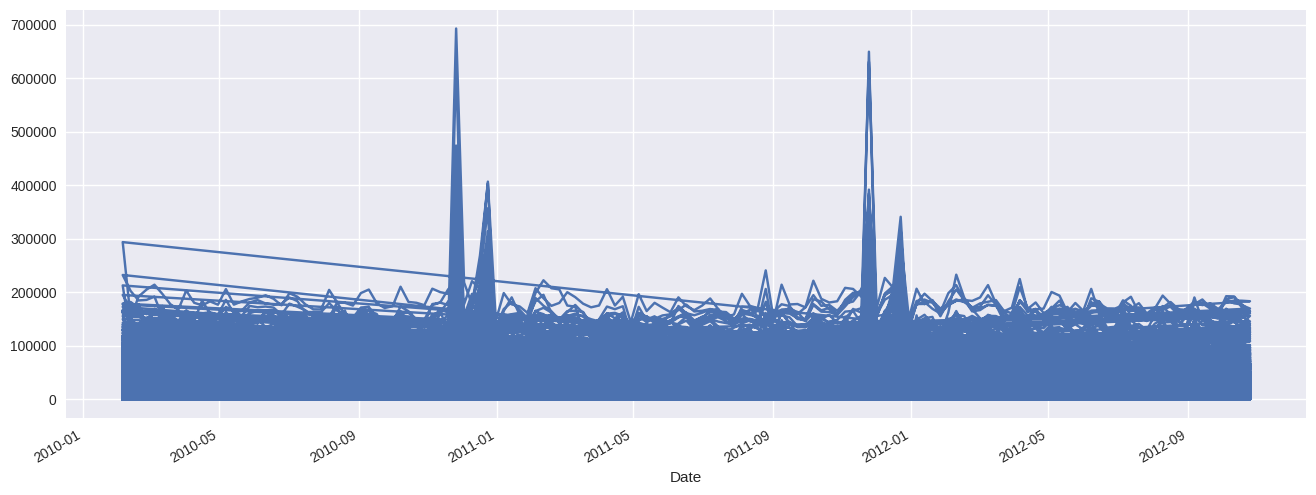

In [ ]:
# Gráfico das Vendas Semanais.
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In [ ]:
# Mapear categorias para números
type_mapping = {'A': 1, 'B': 2, 'C': 3}

# Aplicar o mapeamento à coluna "Type"
df['Type'] = df['Type'].map(type_mapping)

# Verificar o tipo de dado da coluna "Type"
print(df['Type'].dtype)

float64


In [ ]:
# Reamostragem dos Dados para Semanas.
df_week = df.resample('W').mean()

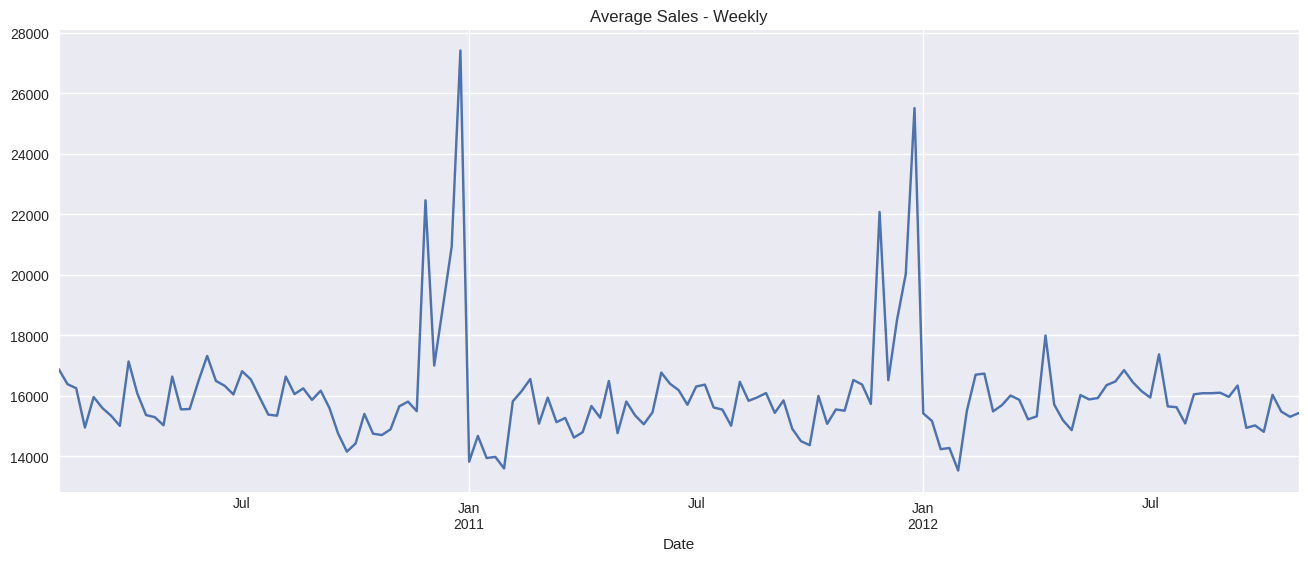

In [ ]:
# Gráfico da Média Semanal de Vendas.
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [ ]:
# Reamostragem como média mensal
df_month = df.resample('MS').mean()

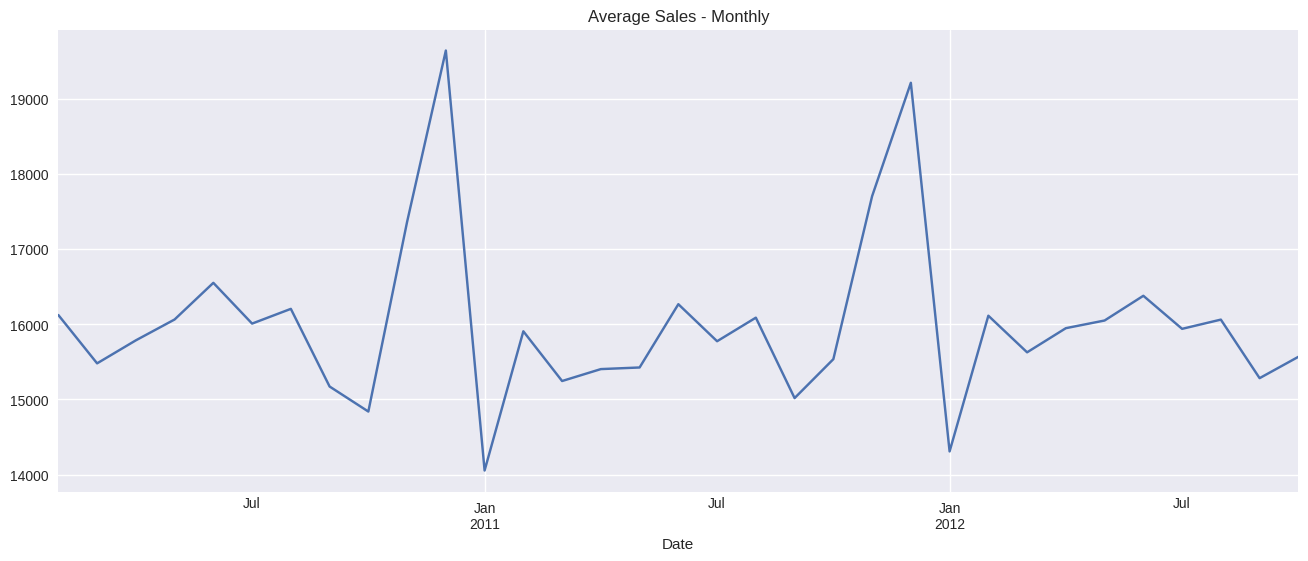

In [ ]:
# Visualização das médias mensais.
plt.figure(figsize=(16,6))          # Configuração do tamanho da figura
df_month['Weekly_Sales'].plot()     # Plotando as vendas médias mensais
plt.title('Average Sales - Monthly')  # Título do gráfico
plt.show()                          # Mostrando o gráfico

# **36- Observando a média móvel e o padrão em 2 semanas.**

In [ ]:
# Encontrando a média e o desvio padrão para uma janela de 2 semanas.
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

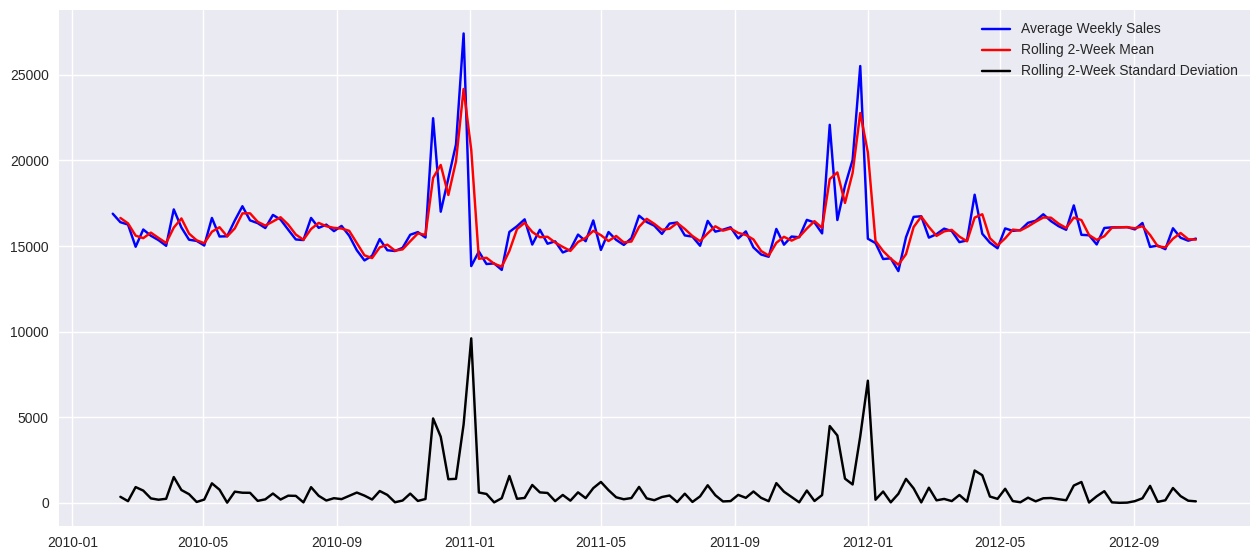

In [ ]:
# Criando o gráfico.
fig, ax = plt.subplots(figsize=(13, 6))

# Plotando as vendas semanais.
ax.plot(df_week['Weekly_Sales'], color='blue', label='Average Weekly Sales')

# Plotando a média móvel de 2 semanas.
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')

# Plotando o desvio padrão móvel de 2 semanas.
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')

# Adicionando legenda.
ax.legend()

# Ajustando layout.
fig.tight_layout()

# **37- Confirmando com o teste Adfuller.**

In [ ]:
adfuller(df_week['Weekly_Sales'])

(-5.927107223737572,
 2.4290492082042356e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

# **38- Treinar - Divisão de teste de dados semanais.**

In [ ]:
# Divisão do conjunto de dados em treino e teste.
train_data = df_week[:int(0.7*(len(df_week)))]
test_data = df_week[int(0.7*(len(df_week))):]

In [ ]:
# Exibição das formas dos conjuntos de treino e teste.
print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 22)
Test: (43, 22)


In [ ]:
# Seleção das variáveis independentes (X) e dependentes (y)
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]]

# Atribuição de variáveis de treino e teste.
X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

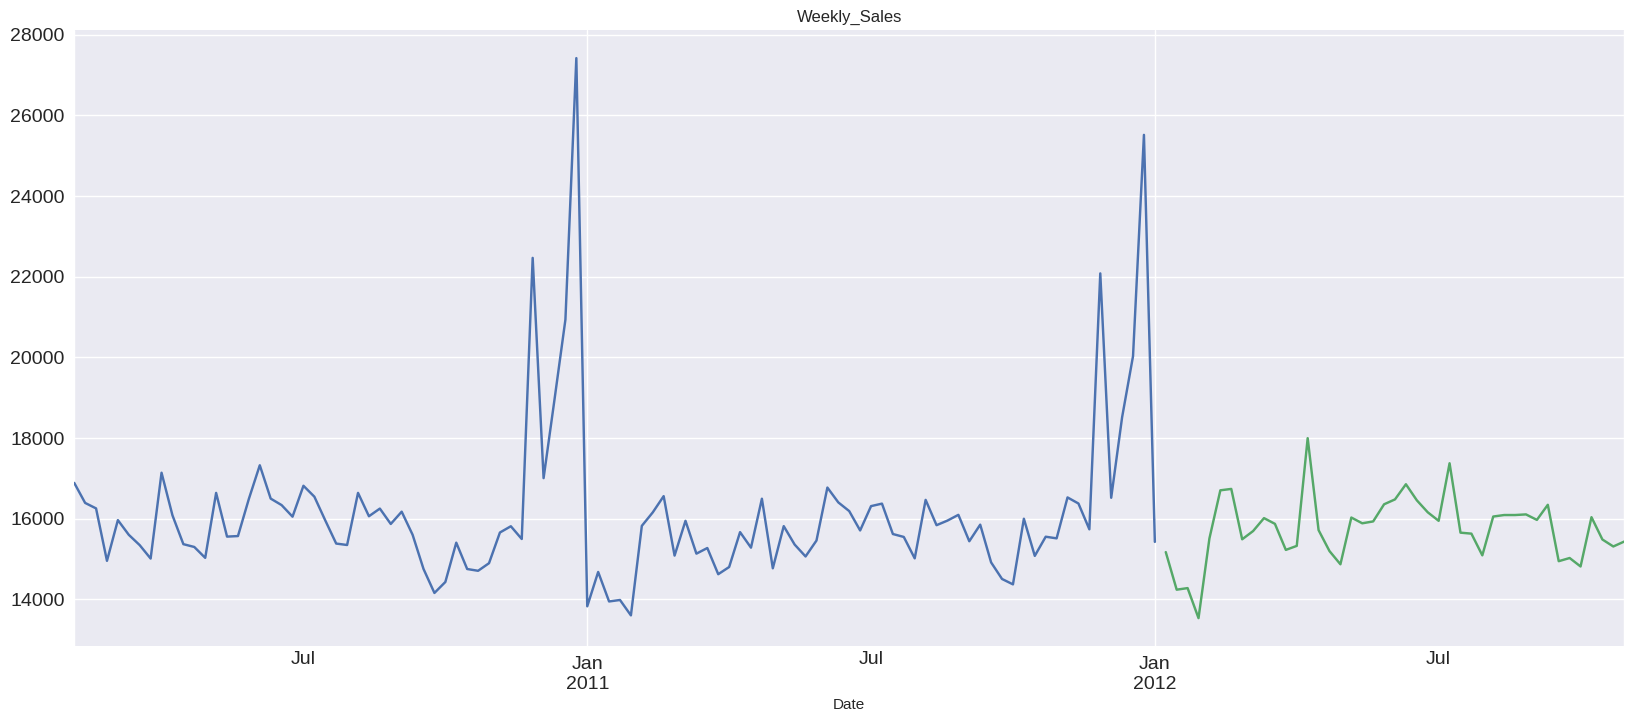

In [ ]:
# Visualização das vendas semanais.
train_data['Weekly_Sales'].plot(figsize=(20,8), title='Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title='Weekly_Sales', fontsize=14)
plt.show()

# **39- Decompondo dados semanais para observar a sazonalidade.**

In [ ]:
# Decomposição da Série Temporal.
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20)

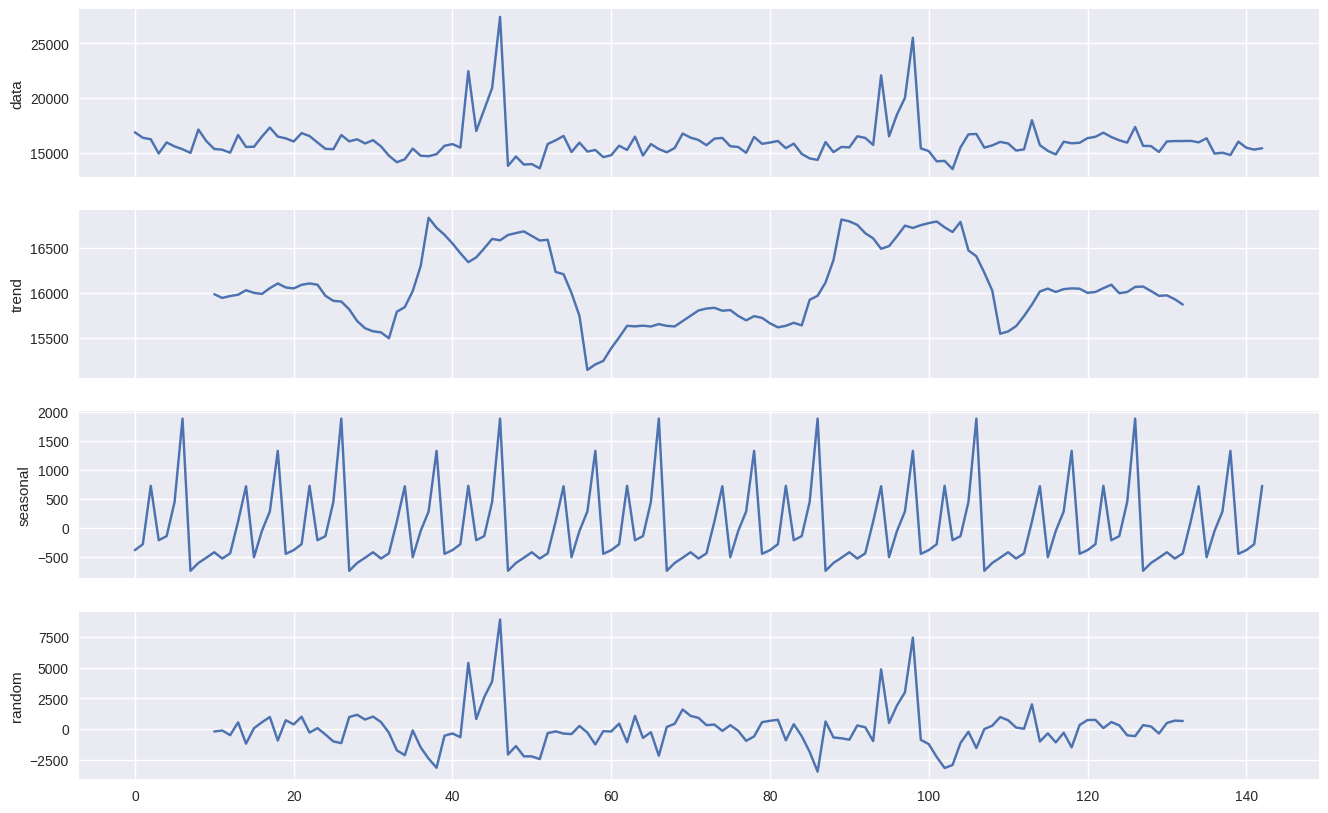

In [ ]:
# Visualização da Decomposição.
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

# **40- Tentando tornar os dados mais estacionários**







In [ ]:
# Calculando a diferença entre cada valor da série e o valor anterior.
df_week_diff = df_week['Weekly_Sales'].diff().dropna()

In [ ]:
# Média Móvel da Diferença
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()

In [ ]:
# Desvio Padrão Móvel da Diferença.
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

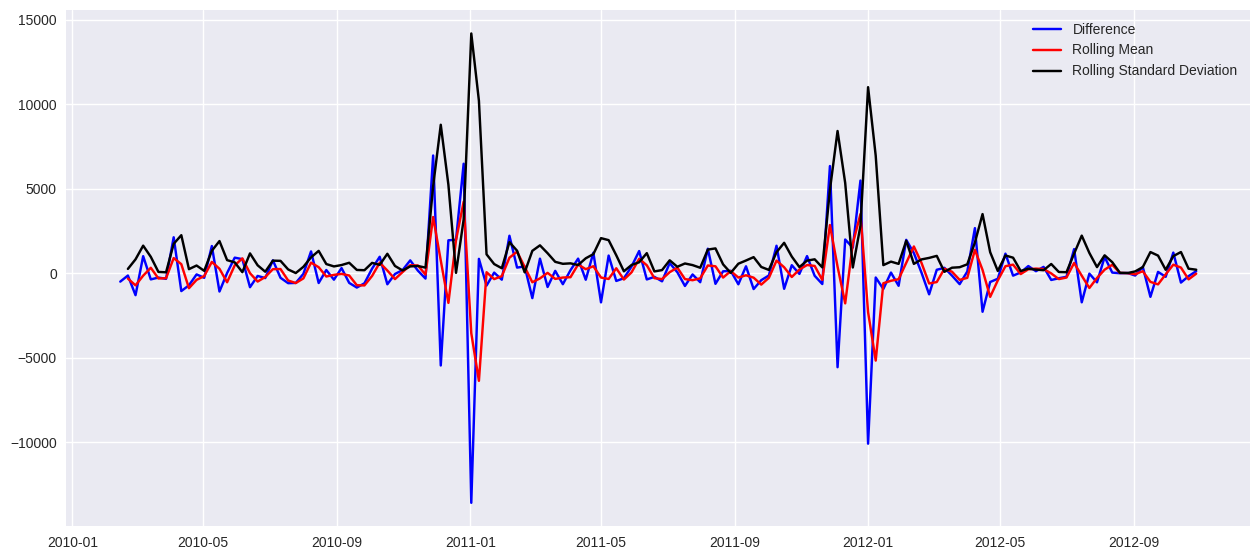

In [ ]:
#  Visualização.
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue', label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
# Deslocamento.
df_week_lag = df_week['Weekly_Sales'].shift().dropna()

In [ ]:
# Média Móvel da Série Deslocada.
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean()

In [ ]:
# Desvio Padrão Móvel da Série Deslocada
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

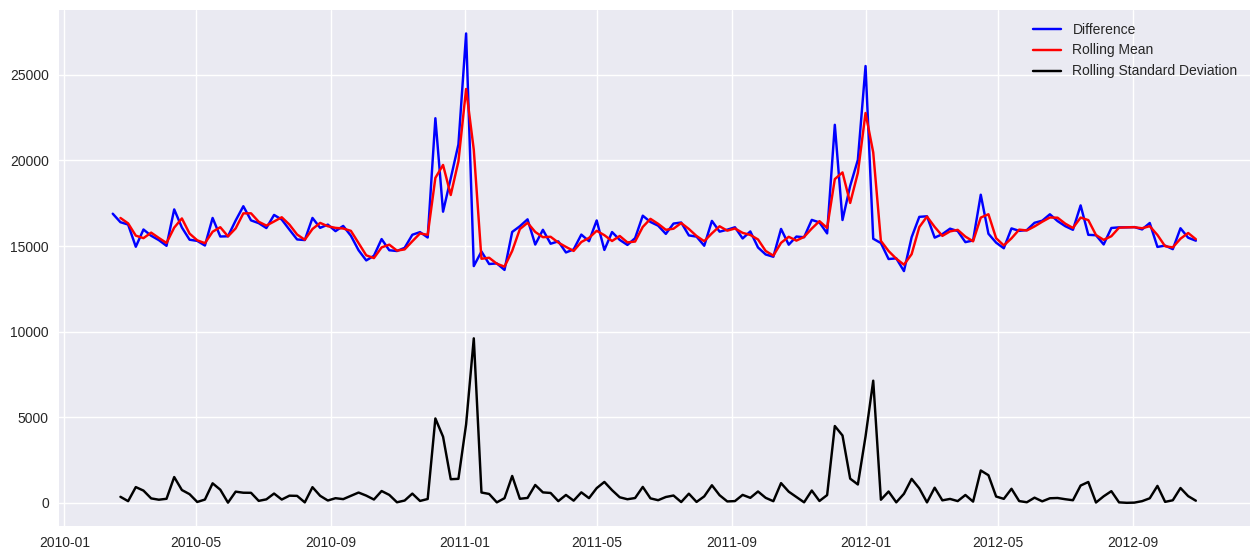

In [ ]:
# Visualização.
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue', label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
# Transformação Logarítmica.
logged_week = np.log1p(df_week['Weekly_Sales']).dropna()

In [ ]:
# Média Móvel da Série Log-transformada.
log_roll_mean = logged_week.rolling(window=2, center=False).mean()

In [ ]:
# Desvio Padrão Móvel da Série Log-transformada.
log_roll_std = logged_week.rolling(window=2, center=False).std()

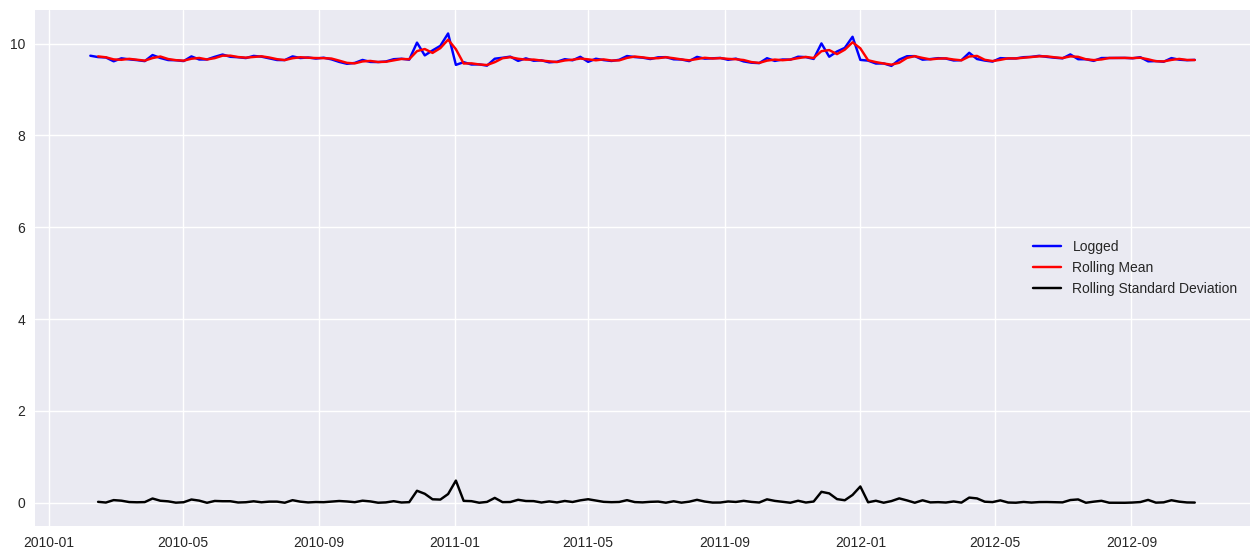

In [ ]:
# Visualização.
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue', label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# **41- MODELO Auto-ARIMA.**
Treinei meus dados sem nenhuma alteração, depois tentei com deslocamento, obtendo log e versão de diferença dos dados. Dados diferenciados deram melhores resultados. Então, resolvi pegar a diferença e usar esses dados.

# **42-Divisão de teste e treino.**

In [ ]:
# Criação dos Conjuntos de Treinamento e Teste:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [ ]:
# Configurando o modelo de treinamento auto_arima.
model_auto_arima = auto_arima(train_data_diff, trace=True,
                              start_p=0, start_q=0, start_P=0, start_Q=0,
                              max_p=20, max_q=20, max_P=20, max_Q=20,
                              seasonal=True, maxiter=200,
                              information_criterion='aic', stepwise=False,
                              suppress_warnings=True, D=1, max_D=10,
                              error_action='ignore', approximation=False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=1.30 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=1.36 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=3.88 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=4.19 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=3.55 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.61 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=3.96 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=4.75 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

Aqui estão as principais configurações e parâmetros que o AutoARIMA está utilizando:

train_data_diff: Esse é o conjunto de dados de treinamento, que já foi transformado em diferenças para garantir que a série seja estacionária.

trace=True: Ativa a exibição do progresso durante a execução do AutoARIMA, mostrando as tentativas de diferentes combinações de parâmetros para o modelo.

start_p=0, start_q=0, start_P=0, start_Q=0: Define os valores iniciais para os parâmetros do modelo ARIMA:

p: Ordem da parte autoregressiva (AR).
q: Ordem da média móvel (MA).
P e Q: Ordens sazonais para AR e MA (se a sazonalidade for detectada).
max_p=20, max_q=20, max_P=20, max_Q=20: Esses valores definem os máximos para os parâmetros AR e MA (não sazonais e sazonais), limitando o espaço de busca do modelo. O modelo irá testar diferentes combinações desses parâmetros até esse limite.

seasonal=True: Indica que o modelo deve considerar a sazonalidade dos dados, ou seja, ele tentará identificar padrões periódicos (como variações sazonais que podem ocorrer durante o ano).

maxiter=200: Define o número máximo de iterações do processo de ajuste.

information_criterion='aic': O critério de informação utilizado para selecionar o melhor modelo entre as opções avaliadas. O AIC (Akaike Information Criterion) é um critério popular que penaliza modelos mais complexos.

stepwise=False: Se definido como False, o modelo realiza uma busca mais exaustiva nos parâmetros possíveis, ao invés de uma busca sequencial.

suppress_warnings=True: Suprime avisos para evitar excesso de saída no console.

D=1: O número de diferenciações sazonais que serão feitas. Usado quando a série tem sazonalidade.

max_D=10: Limite para o número máximo de diferenciações sazonais.

error_action='ignore': Ignora erros durante a execução, o que é útil se o modelo encontrar problemas em alguns estágios da busca.

approximation=False: Desativa a aproximação de resultados durante a busca do modelo.

In [ ]:
# Gerando Previsões com o Modelo AutoARIMA:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))

In [ ]:
# Formatando as Previsões em um DataFrame:
y_pred = pd.DataFrame(y_pred, index=test_data.index, columns=['Prediction'])

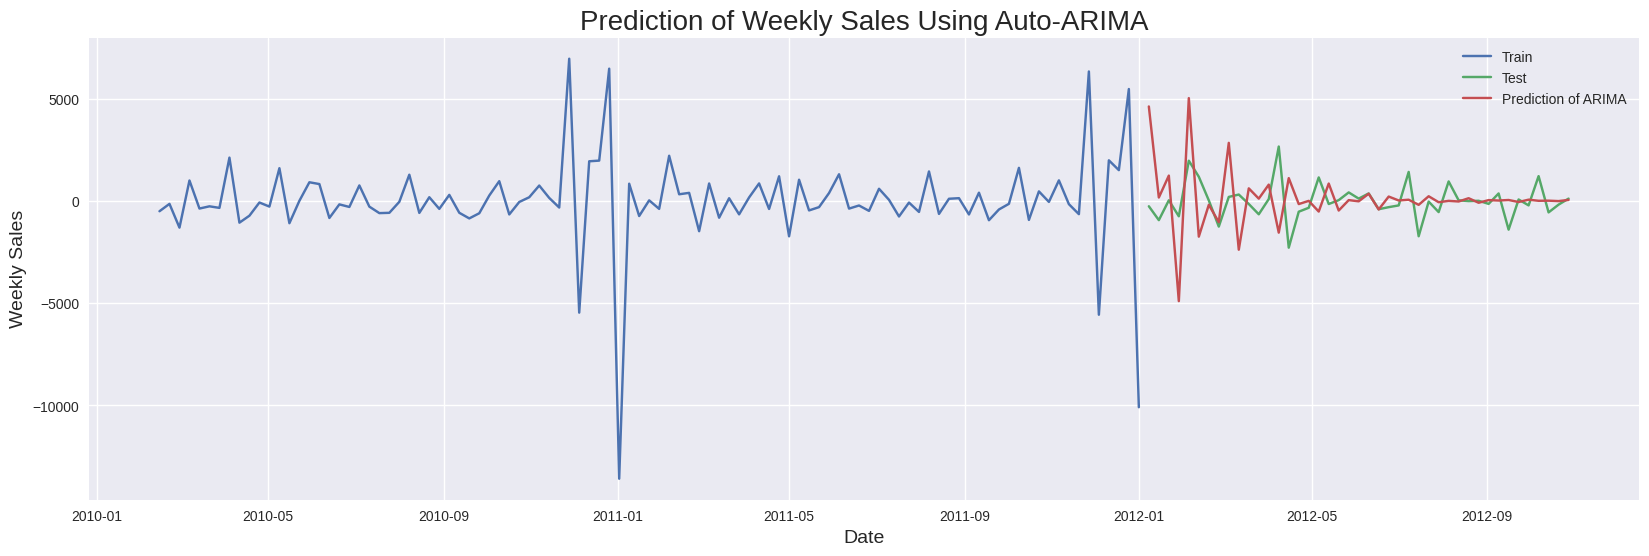

In [ ]:
# Plotando os dados reais e as previsões:
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

# **43- Suavização Exponencial.**

In [ ]:
# Treinamento do Modelo Holt-Winters:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive', damped=True).fit()

In [ ]:
# Previsão com o Modelo Holt-Winters:
y_pred = model_holt_winters.forecast(len(test_data_diff))

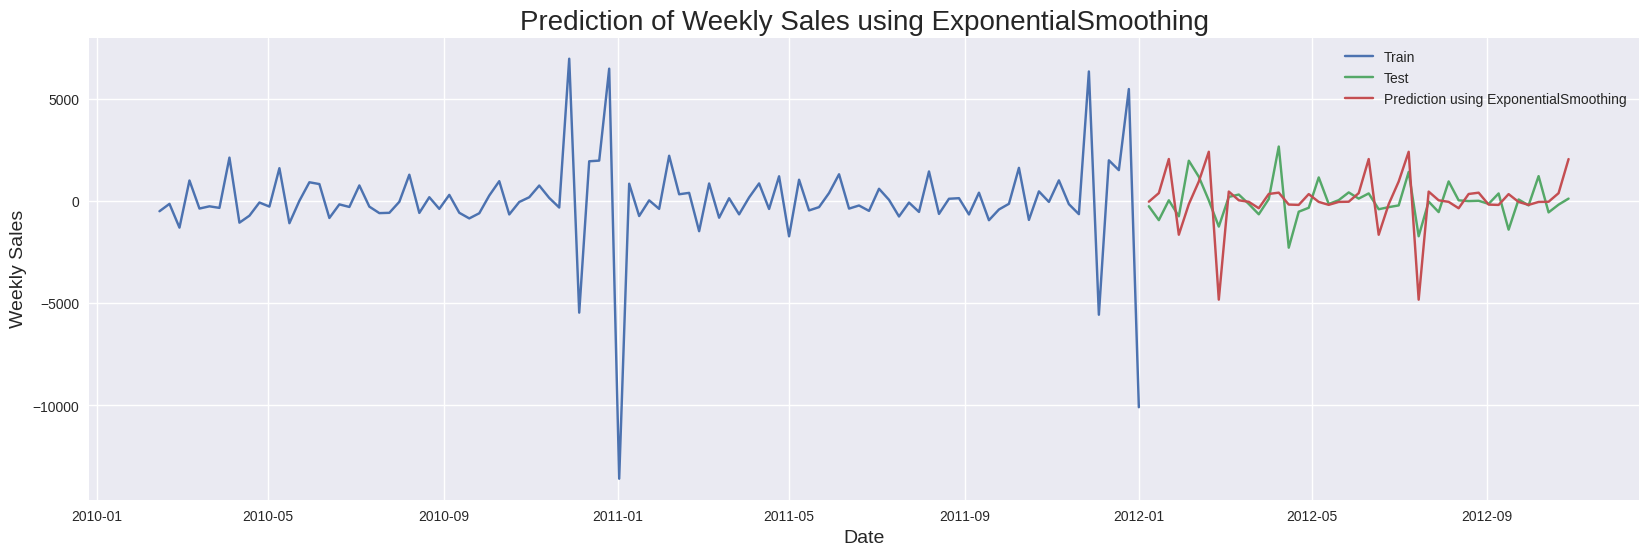

In [ ]:
# Visualização das previsões.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
# Avaliação.
wmae_test(test_data_diff, y_pred)

840.681060966696